<a href="https://colab.research.google.com/github/AliBavarchee/AliBavarchee/blob/main/MAGIC_DATA_ANALYSIS_Extended_Version__cVAE%2BcGAN_Safe_Mode_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

====================================<p align="Center">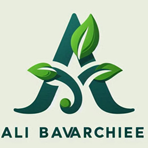</p>====================================
====
| https://github.com/AliBavarchee/ |
----

----

# MAGIC_DATA_ANALYSIS_Extended_Version__cVAE+cGAN
----


# Laboratory of computational physics MOD(A) Exam
### Group 8
### Bavarchee Ali, Maniscalco Davide, Pujatti Mattia, Signor Theosamuele

----------------------------

# Magic data analysis


### Description

The data are Monte Carlo generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse. The characteristic parameters of this ellipse (often called Hillas parameters) are among the image parameters that can be used for discrimination. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions.

The program was run with parameters allowing to observe events with energies down to below 50 GeV.

### Dataset

The dataset is available at this [link](https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data)

Attribute Information:

1. fLength: continuous # major axis of ellipse [mm]
2. fWidth: continuous # minor axis of ellipse [mm]
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
5. fConc1: continuous # ratio of highest pixel over fSize [ratio]
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
7. fM3Long: continuous # 3rd root of third moment along major axis [mm]
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
9. fAlpha: continuous # angle of major axis with vector to origin [deg]
10. fDist: continuous # distance from origin to center of ellipse [mm]
11. class: g,h # gamma (signal), hadron (background)

g = gamma (signal): 12332
h = hadron (background): 6688

For technical reasons, the number of h events is underestimated. In the real data, the h class represents the majority of the events.

The simple classification accuracy is not meaningful for this data, since classifying a background event as signal is worse than classifying a signal event as background. For comparison of different classifiers an ROC curve has to be used. The relevant points on this curve are those, where the probability of accepting a background event as signal is below one of the following thresholds: 0.01, 0.02, 0.05, 0.1, 0.2 depending on the required quality of the sample of the accepted events for different experiments.


### References

Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T., Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S., Vaicilius, A., Wittek W. (2004).
Methods for multidimensional event classification: a case study using images from a Cherenkov gamma-ray telescope.
Nucl.Instr.Meth. A, 516, pp. 511-528.

P. Savicky, E. Kotrc.
Experimental Study of Leaf Confidences for Random Forest.
Proceedings of COMPSTAT 2004, In: Computational Statistics. (Ed.: Antoch J.) - Heidelberg, Physica Verlag 2004, pp. 1767-1774.

J. Dvorak, P. Savicky.
Softening Splits in Decision Trees Using Simulated Annealing.
Proceedings of ICANNGA 2007, Warsaw, (Ed.: Beliczynski et. al), Part I, LNCS 4431, pp. 721-729.


### Assignments

The main goal is to distinguish signal and background events. Two approaches can be followed: 1) exploiting the physics of the detection principle 2) use a physics-agnostic multivariate technique, e.g. a neural network.

* Study the features of the datasets and compare them for signal and background events
* Study the correlations among the features of the datasets for signal and background events
* Compute the "mean-scaled-width" and the "mean-scale-length", i.e. rescale by means of their mean and standard deviation the "Width" and "Length" distributions. Compare them for signal and background events in the cases of little or a lot of light ("fSize")
* Perform a Principal Component Analysis on that dataset for the signal and the background events
* Perform a multivariate analysis with the technique you prefer and evaluate its performance (e.g. in terms of Area Under the (ROC) Curve)

### Contacts

* Ruben Lopez <ruben.lopezcoto@pd.infn.it>,
* Mosè Mariotti <mose.mariotti@pd.infn.it>


In [ ]:
%%html
<iframe src="http://www.magic.iac.es/" width="820" height="500"></iframe>

### Introduction

- MAGIC: Major Atmospheric Gamma Imaging Cherenkov telescope $\quad\longrightarrow\quad$ Study of gamma rays
- Raw data $\quad\longrightarrow\quad$ Image parametrization

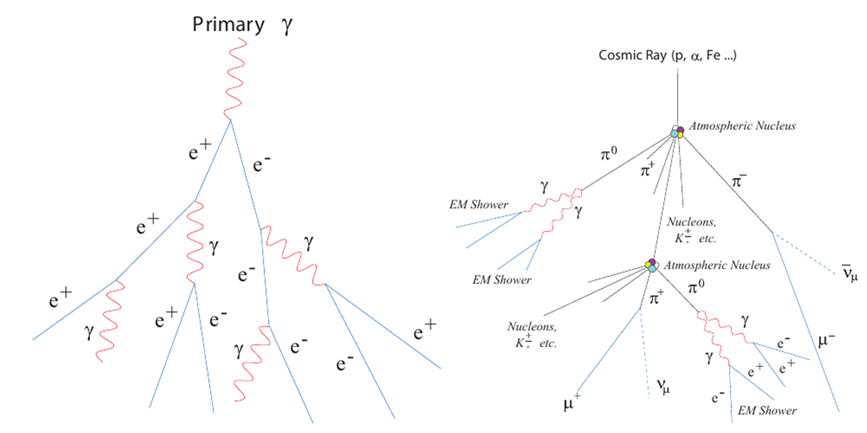

- Simulation data and assignment $\quad\longrightarrow\quad$ Study of the features, multivariate analysis.

### Study the features of the datasets and compare them for signal and background events

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from scipy import linalg as la
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance

from tqdm import tqdm
import time

# run this, if needed, to download the data
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data

seed = 12345
np.random.seed(seed)

In [ ]:
#pip install keras_tuner

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Input, Model
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, roc_auc_score
import os
import json
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import seaborn as sns
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
import os
import pickle
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from keras_tuner import RandomSearch
import seaborn as sns
import keras_tuner as kt
from tensorflow.keras import layers, models

In [ ]:
plt.style.use('default')

In [ ]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data

In [ ]:
features = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv('magic04.data',delimiter=',',names = features)

# Add a column with a binary value "label" that is more suitable to be used by a classifier
df['label'] = pd.Series(np.zeros(len(df)), index=df.index, dtype=int)
df.loc[df['class'] == 'g', 'label'] = 1
df.loc[df['class'] == 'h', 'label'] = 0
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  label  
0  40.0920   81.8828     g      1  
1   6.3609  205.2610     g      1  
2  76.9600  256.7880     g      1  
3  10.4490  116.7370     g      1  
4   4.6480  356.4620     g      1

*The best way to study the features contained in a our dataframe is to plot them as histograms. To make the figures more readable and also allowing for the possibility of an immediate comparison of signal and background events, the histograms are normalized and plot one on the other.*

In [ ]:
signals = pd.DataFrame(df[df['class']=='g'])
background = pd.DataFrame(df[df['class']=='h'])

unit_meas = ['mm', 'mm', '# phot', 'ratio', 'ratio', 'mm', 'mm', 'mm', 'deg', 'mm']

n_lines = len(features)//2
fig, ax = plt.subplots(nrows=n_lines, ncols=2, figsize=(16, 5*n_lines))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i].hist(signals[features[i]],    bins=50, alpha=0.5, color='blue', label='signal',     density=True)
    ax[i].hist(background[features[i]], bins=50, alpha=0.5, color='red',  label='background', density=True)
    ax[i].set_title(features[i] + ' [' + unit_meas[i] + ']')
    ax[i].legend()

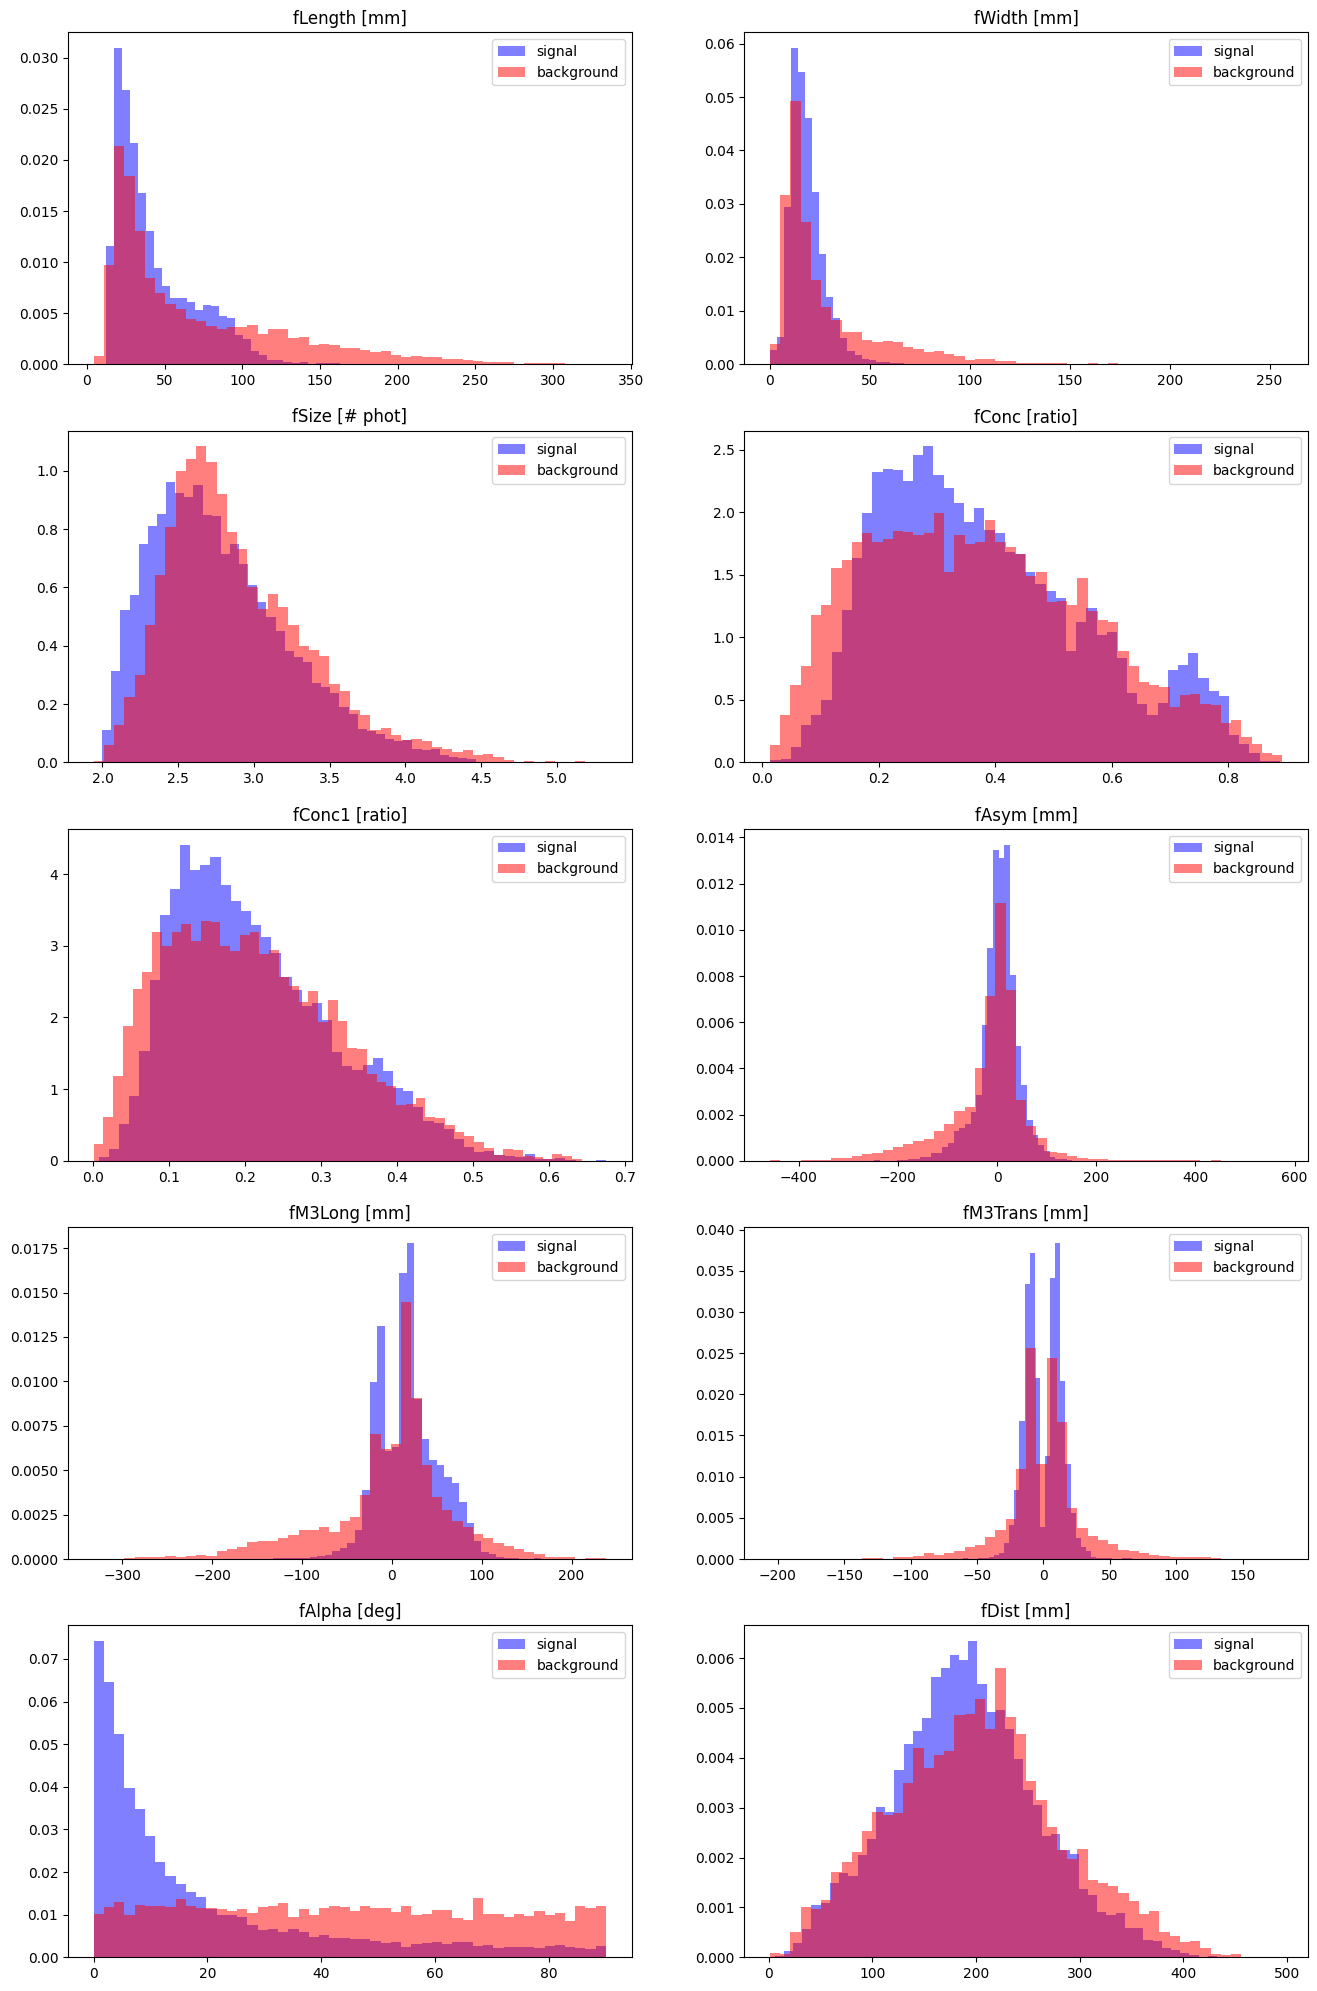

The purpose of these histogram is not to carry out a full analysis, but to get a first idea about the main feature's differences. The most interesting histogram is the one of the $fAlpha$ variable: here the *signal* and the *background* beahave completely differently, the first has a high peak at low angle values, while the second is distributed almost uniformly over the entire spectrum.
The other features, instead, do not show particular qualitative differences, and this lead to think about $fAlpha$ as the most important feature in discriminating *gammas* from *hadrons*. The only thing that we can say is that in general background data seems to be more dispersed than the others, that instead present higher and better defined peaks and also are restricted in a smaller region of the x-axis. An explanation of this behavior can be brought back maybe on some restrictions during their simulation.

### Study the correlations among the features of the datasets for signal and background events

*After considering each attribute independently, another fast analysis that can be done involves the correlations among different features of the dataset. A first, simple way according which we can do it is looking at their correlation matrix...*

In [ ]:
df_corr = df[features].drop(['class'], axis=1)
corr_matrix = df_corr.corr()

*and maybe plotting it!*

In [ ]:
_, corr_ax = plt.subplots(figsize=(7,6))

# Since the correlation matrix is symmetric respect to the principal diagonal, we can just plot half of it
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, center=0, mask=mask, ax=corr_ax, linewidths=1,cmap='seismic')
corr_ax.set_title("Correlation matrix of the features")
sns.set(font_scale=2)

*From this initial check of the correlations, we can immediatly exclude some variables: the distance between the highest pixel to the center (fAsym), the third moments (fM3Long and fM3Trans) and the angle (fAlpha) are very poorly correlated with the other features and so we won't continue with them, in the sequent, and deeper, analysis.*

*Then, we think that the clearest way to plot these correlations is using a pairplot*

<ipython-input-9-c18bdf862e4b>:12: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in pp._legend.legendHandles:


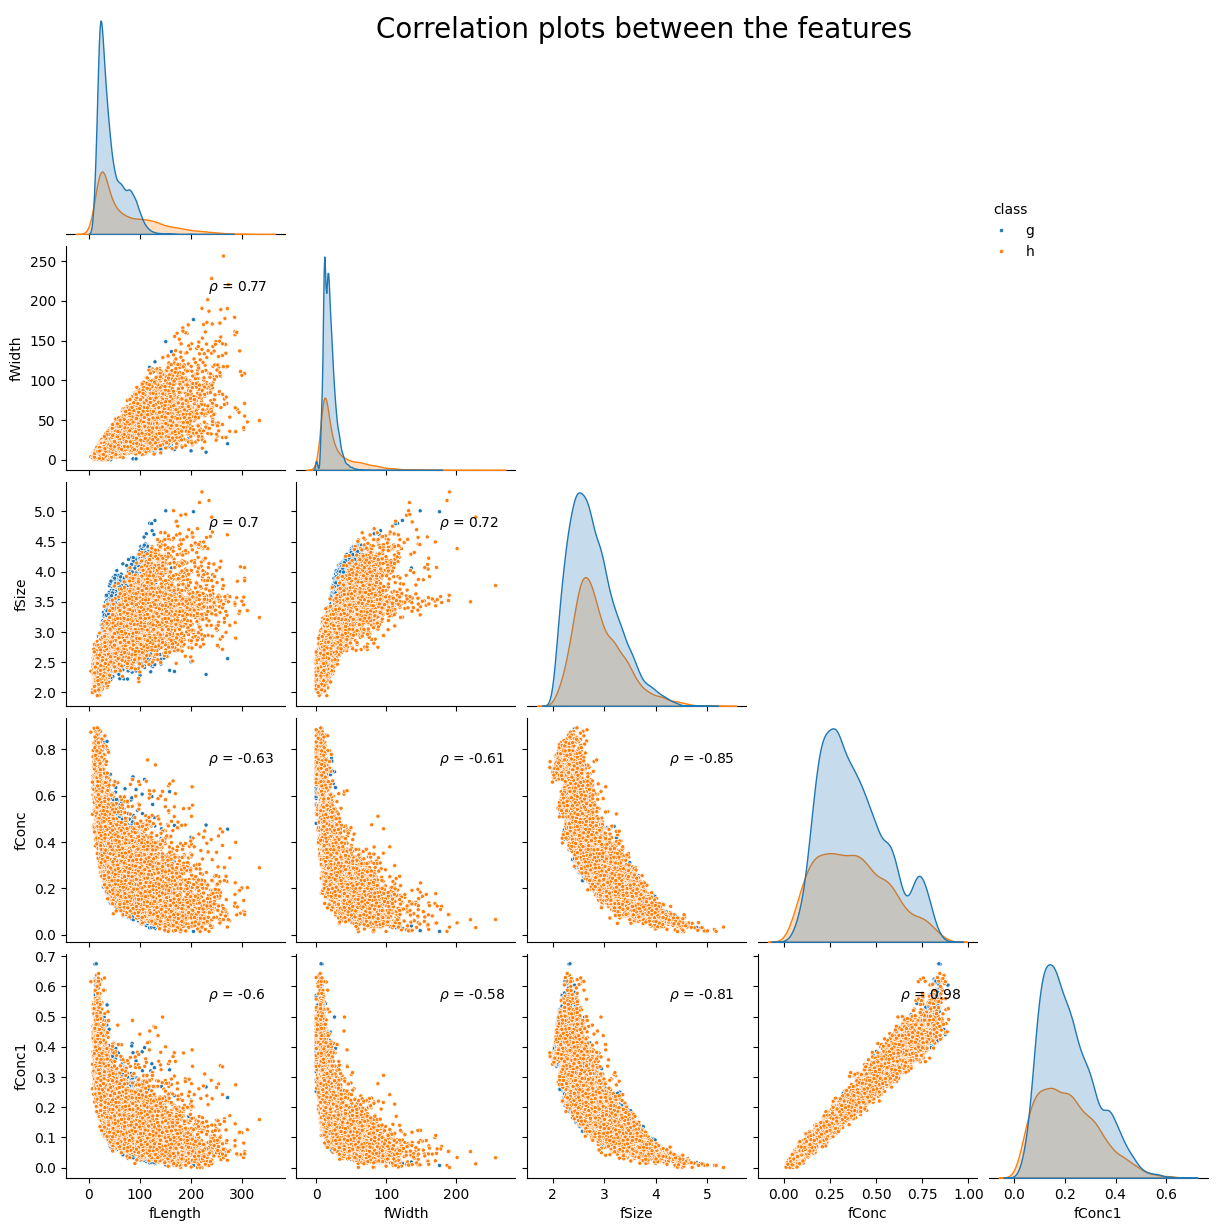

In [ ]:
plt.style.use('default')
correlated_vars = ['fLength','fWidth','fSize','fConc','fConc1']
corr_coeffs = corr_matrix[correlated_vars].loc[correlated_vars]

pp = sns.pairplot(df, diag_kind='kde', hue='class', vars=correlated_vars, markers='.', corner=True)

for (i, j), ax in np.ndenumerate(pp.axes):
    if i>j: ax.text(s=r'$\rho$ = ' + str(round(corr_coeffs.iloc[i, j], 2)), x=0.65, y=0.8, transform=ax.transAxes)

#legend
pp._legend.set_bbox_to_anchor((0.8, 0.8))
for lh in pp._legend.legendHandles:
    lh.set_alpha(1)
    lh._sizes = [500]
pp.fig.suptitle('Correlation plots between the features', size=20);

Some results are as expected: $fConc$ and $fConc1$, that are proportional by definition, are very strongly correlated, and they are anticorrelated with $FSize$. No other strong correlations/anticorrelations are present here.

### Compute the "mean-scaled-width" and the "mean-scale-length", i.e. rescale by means of their mean and standard deviation the "Width" and "Length" distributions. Compare them for signal and background events in the cases of little or a lot of light ("fSize").

*Here we have just to compute some new varibles that should improve the existing correlations between the Hillas parameters. <br>
These new variables were designed in order to provide a first way of comparing observed data (especially length and width of the ellipse) with the corresponding expectation values obtained from simulation. Since data we are dealing with are the simulated ones, we cannot make such comparison, but we can calculate anyway these interesting numbers.*

Two normalised parameters **Scaled Width (SW)** and **Scaled Length (SL)**:

$$
SW = \frac{w(q,p) - <w(q,p)>}{\sigma_w(q,p)} \qquad SL = \frac{l(q,p) - <l(q,p)>}{\sigma_l(q,p)}
$$

In [ ]:
df["Scaled_Length"] = ( df["fLength"] - df["fLength"].mean() ) / df["fLength"].std()
df["Scaled_Width"] = ( df["fWidth"] - df["fWidth"].mean() ) / df["fWidth"].std()

df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  label  Scaled_Length  Scaled_Width  
0  40.0920   81.8828     g      1      -0.577211     -0.336795  
1   6.3609  205.2610     g      1      -0.510955     -0.570012  
2  76.9600  256.7880     g      1       2.568210      6.205695  
3  10.4490  116.7370     g      1      -0.694749     -0.687241  
4   4.6480  356.4620     g      1       0.516609      0.476371

These parameters have the noticeable advantage of being easily combined in stereoscopic observations in **Mean Scaled Width** and **Mean Scaled Length**:
   
$$
MSW = \frac{\sum SW}{\sqrt{N}} \qquad MSL = \frac{\sum SL}{\sqrt{N}}
$$

From simulations, one can show that the Mean Scaled Width and Mean Scaled Length are almost uncorrelated and can therefore be combined in a single variable **Mean Scaled Sum**:

$$
MSS = \frac{MSW + MSL}{\sqrt{2}}
$$

In [ ]:
# Recompute the 2 dataframes to include also these last variables
signals = pd.DataFrame(df[df['class']=='g'])
background = pd.DataFrame(df[df['class']=='h'])

s_MSL = sum(signals["Scaled_Length"])/math.sqrt(len(signals["Scaled_Length"]))
s_MSW = sum(signals["Scaled_Width"])/math.sqrt(len(signals["Scaled_Width"]))
s_MSS = ( s_MSL + s_MSW ) / math.sqrt(2)

b_MSL = sum(background["Scaled_Length"])/math.sqrt(len(background["Scaled_Length"]))
b_MSW = sum(background["Scaled_Width"])/math.sqrt(len(background["Scaled_Width"]))
b_MSS = ( b_MSL + b_MSW ) / math.sqrt(2)

print("Features associated with pure signals:")
print("Mean Scale Length: ", s_MSL)
print("Mean Scale Width: ", s_MSW)
print("Mean Scale Sum: ", s_MSS)

print("\n")

print("Features associated with background:")
print("Mean Scale Length: ", b_MSL)
print("Mean Scale Width: ", b_MSW)
print("Mean Scale Sum: ", b_MSS)

Features associated with pure signals:
Mean Scale Length:  -25.15265647574851
Mean Scale Width:  -21.719957080601613
Mean Scale Sum:  -33.14394289763167


Features associated with background:
Mean Scale Length:  34.15485809252024
Mean Scale Width:  29.49358659507151
Mean Scale Sum:  45.00624685057301


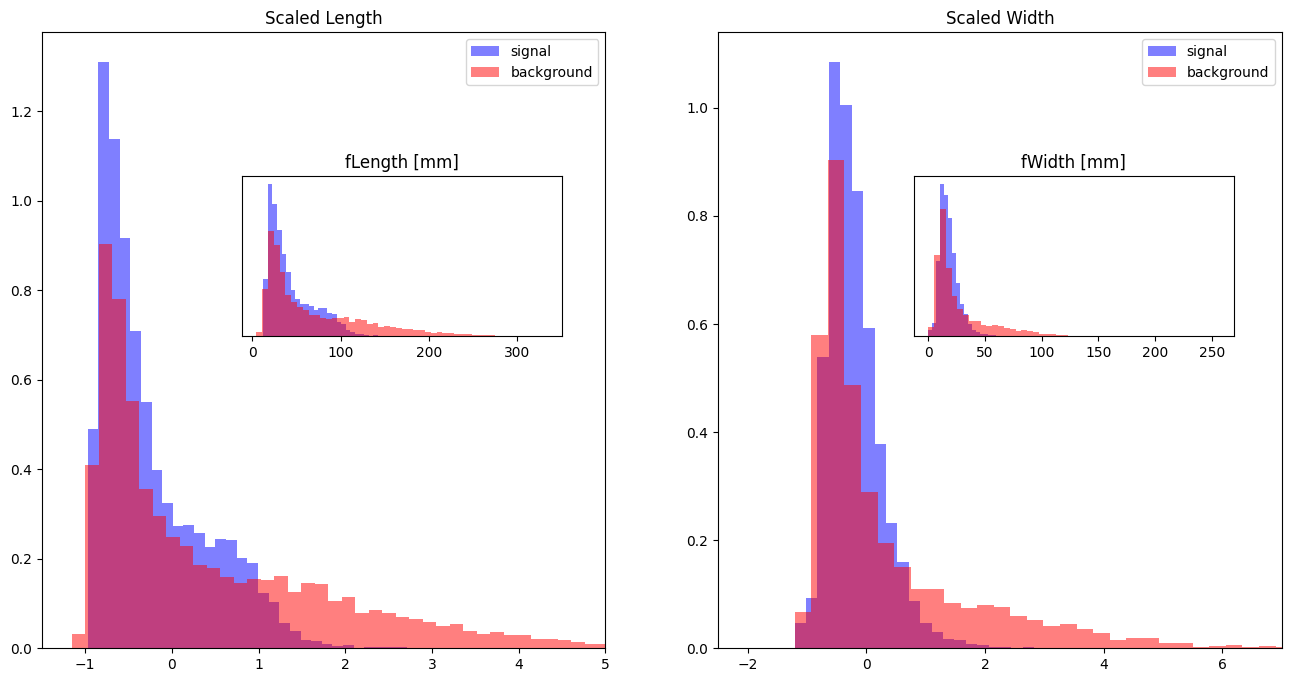

In [ ]:
fig3, ax3 = plt.subplots(1, 2, figsize=(16,8))

ax3[0].hist(signals["Scaled_Length"],bins=50, alpha=0.5, color='blue', label='signal', density=True);
ax3[0].hist(background["Scaled_Length"],bins=50, alpha=0.5, color='red', label='background', density=True);
ax3[0].set_title("Scaled Length")
ax3[0].set_xlim(-1.5,5)
ax3[0].legend()

old_length = fig3.add_axes([0.25, 0.5, 0.2, 0.2])
old_length.hist(signals["fLength"],    bins=50, alpha=0.5, color='blue', label='signal',     density=True)
old_length.hist(background["fLength"], bins=50, alpha=0.5, color='red',  label='background', density=True)
old_length.set_title("fLength [mm]")
old_length.set_yticks([])

ax3[1].hist(signals["Scaled_Width"],bins=50, alpha=0.5, color='blue', label='signal', density=True);
ax3[1].hist(background["Scaled_Width"],bins=50, alpha=0.5, color='red', label='background', density=True);
ax3[1].set_title("Scaled Width")
ax3[1].set_xlim(-2.5,7)
ax3[1].legend()

old_width = fig3.add_axes([0.67,0.5,0.2,0.2])
old_width.hist(signals["fWidth"],    bins=50, alpha=0.5, color='blue', label='signal',     density=True)
old_width.hist(background["fWidth"], bins=50, alpha=0.5, color='red',  label='background', density=True)
old_width.set_title("fWidth [mm]")
old_width.set_yticks([]);

*Finally, we have to compare the results in the case of little or a lot of light, i.e. when the parameter "fSize" is big or not. We will do it simply selecting subset of data according to a certain threshold, and then plotting them in an histogram.*

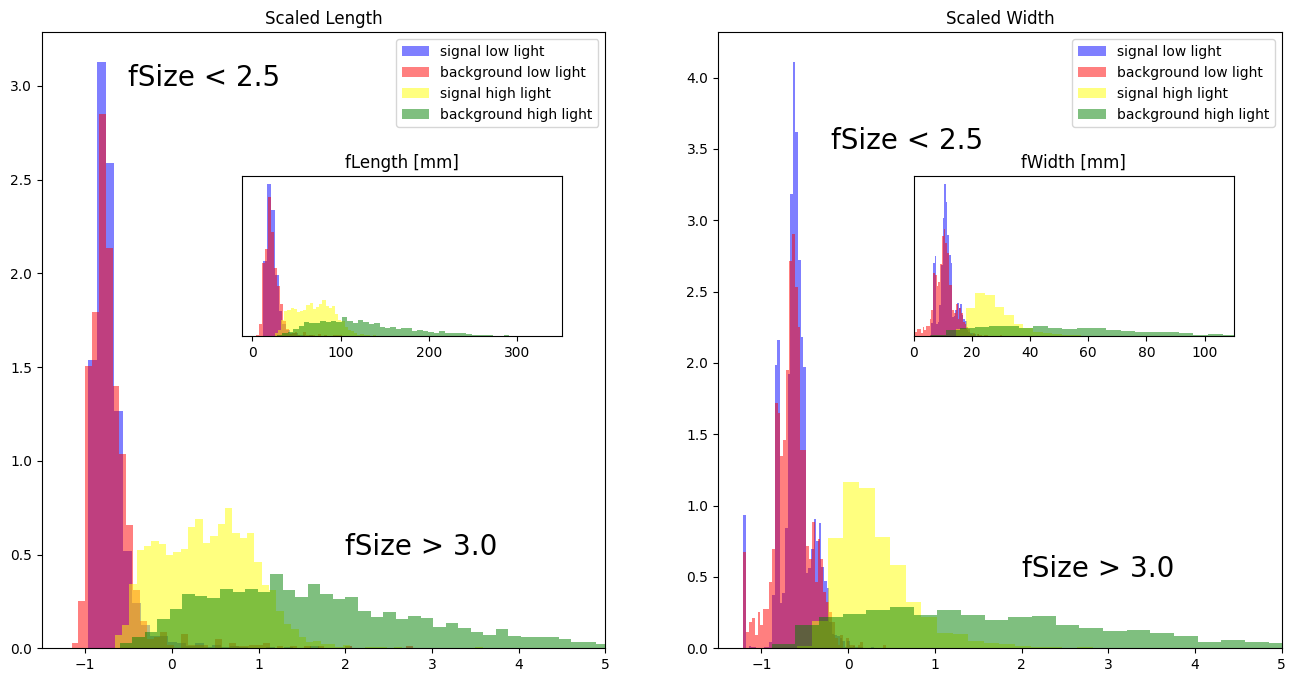

In [ ]:
threshold_high = 3.0
threshold_low  = 2.5

low_light_s = signals.loc[signals["fSize"] < threshold_low, ["fLength", "fWidth", "Scaled_Width", "Scaled_Length"]]
low_light_b = background.loc[background["fSize"] < threshold_low, ["fLength", "fWidth", "Scaled_Width", "Scaled_Length"]]

high_light_s = signals.loc[signals["fSize"] > threshold_high, ["fLength", "fWidth", "Scaled_Width", "Scaled_Length"]]
high_light_b = background.loc[background["fSize"] > threshold_high, ["fLength", "fWidth", "Scaled_Width", "Scaled_Length"]]


fig4, ax4 = plt.subplots(1, 2, figsize=(16,8))

ax4[0].hist(low_light_s["Scaled_Length"],  bins=50, alpha=0.5, color='blue',   label='signal low light',      density=True)
ax4[0].hist(low_light_b["Scaled_Length"],  bins=50, alpha=0.5, color='red',    label='background low light',  density=True)
ax4[0].hist(high_light_s["Scaled_Length"], bins=50, alpha=0.5, color='yellow', label='signal high light',     density=True)
ax4[0].hist(high_light_b["Scaled_Length"], bins=50, alpha=0.5, color='green',  label='background high light', density=True)
ax4[0].set_title("Scaled Length")
ax4[0].set_xlim(-1.5, 5)
ax4[0].legend()
ax4[0].annotate("fSize < " + str(threshold_low), xy = (-0.5, 3), size=20)
ax4[0].annotate("fSize > " + str(threshold_high), xy = (2, 0.5), size=20)


old_length_lowhigh = fig4.add_axes([0.25, 0.5, 0.2, 0.2])
old_length_lowhigh.hist(low_light_s["fLength"], bins=50, alpha=0.5, color='blue', density=True)
old_length_lowhigh.hist(low_light_b["fLength"], bins=50, alpha=0.5, color='red',  density=True)
old_length_lowhigh.hist(high_light_s["fLength"], bins=50, alpha=0.5, color='yellow', density=True)
old_length_lowhigh.hist(high_light_b["fLength"], bins=50, alpha=0.5, color='green',  density=True)
old_length_lowhigh.set_title("fLength [mm]")
old_length_lowhigh.set_yticks([])



ax4[1].hist(low_light_s["Scaled_Width"], bins=50, alpha=0.5, color='blue',   label='signal low light',      density=True)
ax4[1].hist(low_light_b["Scaled_Width"], bins=50, alpha=0.5, color='red',    label='background low light',  density=True)
ax4[1].hist(high_light_s["Scaled_Width"],bins=50, alpha=0.5, color='yellow', label='signal high light',     density=True)
ax4[1].hist(high_light_b["Scaled_Width"],bins=50, alpha=0.5, color='green',  label='background high light', density=True)
ax4[1].set_title("Scaled Width")
ax4[1].set_xlim(-1.5,5)
ax4[1].legend()
ax4[1].annotate("fSize < " + str(threshold_low), xy = (-0.2, 3.5), size=20)
ax4[1].annotate("fSize > " + str(threshold_high), xy = (2, 0.5), size=20)

old_width_lowhigh = fig4.add_axes([0.67,0.5,0.2,0.2])
old_width_lowhigh.hist(low_light_s["fWidth"],  bins=50, alpha=0.5, color='blue', density=True)
old_width_lowhigh.hist(low_light_b["fWidth"],  bins=50, alpha=0.5, color='red',  density=True)
old_width_lowhigh.hist(high_light_s["fWidth"], bins=50, alpha=0.5, color='yellow', density=True)
old_width_lowhigh.hist(high_light_b["fWidth"], bins=50, alpha=0.5, color='green',  density=True)
old_width_lowhigh.set_xlim(0,110)
old_width_lowhigh.set_title("fWidth [mm]")
old_width_lowhigh.set_yticks([]);

These histograms are very interesting: with few light gamma's scaled length and width are similar with background's scaled length and width. With high light, instead, the histograms show differences in both cases: signal has still a peaked behaviour, while the background has flattened. A similar behavior holds also for the original parameters fLength and fWidth, so we don't think that this step will provide so much additional information to us, especially becuase this is nothing but a renormalization of the length and the width that will be anyway computed before applying a multivariate method in the next steps. Another proof of what we are saying can be found when performing the PCA.

### Perform a Principal Component Analysis on that dataset for the signal and the background events

*Before performing directly a Principal Component Analysis over our dataset, it is better to give a first look at the covariance matrix with the corresponding eigenvectors and eigenvalues. This choice is done especially because we are working with several features (precisely, in a 10-dimensional feature space) and so it is fine to have an idea a priori of which and how many components dominate over the others.*

In [ ]:
# Standardize data
std_data = StandardScaler().fit_transform(df.drop(['class', 'label','Scaled_Length','Scaled_Width'], axis=1)).T # normalizing the features

# Eigenvalues
eigA, eigV = la.eig(np.cov(std_data))
eigA = np.real(eigA)
print(sorted(eigA,reverse=True))

[4.224212992629756, 1.5752707234692038, 1.0118585196390186, 0.9940649615760566, 0.7420584088376551, 0.6501206481963044, 0.4075600256409164, 0.22037401335211979, 0.1547615179961863, 0.020243978662257873]


*The eigenvalues are already ordered by magnitude, and we can notice that the first ones are a couple of order of magnitude larger that the last, and so this may represent a feature that can be easily dropped without losing basically any information. A deeper analysis on the number of principal components to keep can be performed by computing the total variability, i.e. the fraction of information still avaiable reducing the number of components, for each k < 10.*

*The PCA will be performed using a proper function imported from sklearn, that make use of the Singular Value Decomposition (SVD) of the data to project them to a lower dimensional space.*

In [ ]:
# Here we just make a generic study in order to understand which is the best number of components

pca = PCA().fit(std_data)
cev = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, std_data.shape[0]+1), cev, color='red', lw=3)
plt.axvline(3, ls='--', c='black', lw=1)
plt.annotate(round(cev[2], 2), xy=(2,0.75))
plt.axvline(6, ls='--', c='black', lw=1)
plt.annotate(round(cev[5], 2), xy=(6.2,0.92))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Study on the number of principal components');

*Now that we can see easily how much information we lose for any number of principal components we select, we make the following choice: we will perform two different PCA, one more "safe" with 6 principal components (to preserve the 94% of the information) and one less safe but also less computationally expensive with 3 principal components (73% of the total variance) that also allow for a visual representation of the data. In this way, we will improve the performances of the classifiers in the next step of the analysis and we will also provide a term of comparison between the two dimensionality reduced datasets.*

In [ ]:
# Now let's run the PCA

# Case 1: 6 principal components
pca6 = PCA(n_components=6).fit_transform(std_data.T)
df_6 = pd.DataFrame(data = pca6, columns = ['PCA-1', 'PCA-2', 'PCA-3', 'PCA-4', 'PCA-5', 'PCA-6'])
df_6['label'] = df['label']

# Case 2: 3 principal components
pca3 = PCA(n_components=3).fit_transform(std_data.T)
df_3 = pd.DataFrame(data = pca3, columns = ['PCA-1', 'PCA-2', 'PCA-3'])
df_3['label'] = df['label']

df_3.head(5)

PCA-1     PCA-2     PCA-3  label
0 -1.016550  0.369256  0.809951      1
1 -1.679961  0.549225 -0.981615      1
2  5.966242 -1.831316  1.497205      1
3 -2.557060  0.031629 -0.441387      1
4  1.655853  0.552902 -0.555512      1

In [ ]:
#%matplotlib qt

ax_sct = plt.figure(figsize=(6,6)).add_subplot(111, projection='3d')

signal_pca3 = df_3[df_3["label"]==1]
background_pca3 = df_3[df_3["label"]==0]

ax_sct.scatter(signal_pca3['PCA-1'], signal_pca3['PCA-2'], signal_pca3['PCA-3'], color="blue", label="signal")
ax_sct.scatter(background_pca3['PCA-1'], background_pca3['PCA-2'], background_pca3['PCA-3'], color="red", label="background")
ax_sct.set_xlabel("Principal Component 1")
ax_sct.set_ylabel("Principal Component 2")
ax_sct.set_zlabel("Principal Component 3")
ax_sct.legend();

*Let's examine also the projections.*

In [ ]:
%matplotlib inline

_, ax_proj = plt.subplots(1, 3, figsize=(16,5))
ax_proj[0].scatter(signal_pca3['PCA-1'], signal_pca3['PCA-2'], color="blue", label="signal", alpha=0.3, s=10)
ax_proj[0].scatter(background_pca3['PCA-1'], background_pca3['PCA-2'], color="red", label="background", alpha=0.3, s=10)
ax_proj[0].set_xlabel("Principal Component 1")
ax_proj[0].set_ylabel("Principal Component 2")
ax_proj[0].legend()

ax_proj[1].scatter(signal_pca3['PCA-2'], signal_pca3['PCA-3'], color="blue", label="signal", alpha=0.3, s=10)
ax_proj[1].scatter(background_pca3['PCA-2'], background_pca3['PCA-3'], color="red", label="background", alpha=0.3, s=10)
ax_proj[1].set_xlabel("Principal Component 2")
ax_proj[1].set_ylabel("Principal Component 3")
ax_proj[1].legend()

ax_proj[2].scatter(signal_pca3['PCA-1'], signal_pca3['PCA-3'], color="blue", label="signal", alpha=0.3, s=10)
ax_proj[2].scatter(background_pca3['PCA-1'], background_pca3['PCA-3'], color="red", label="background", alpha=0.3, s=10)
ax_proj[2].set_xlabel("Principal Component 1")
ax_proj[2].set_ylabel("Principal Component 3")
ax_proj[2].legend();

From these last plots it can be seen that the background is more spread out as compared to the signal. This is most evident in the first panel.

## Another technique of dimensionality reduction: t-SNE

*t-SNE is a relatively new dimensionality reduction technique and differs from PCA by preserving only small pairwise distances or local similarities whereas PCA preserves large pairwise distances to maximize variance.*

In [ ]:
tsne3 = TSNE(n_components=3,perplexity=50).fit_transform(std_data.T)

In [ ]:
df_tsne3 = pd.DataFrame(data = tsne3, columns = ['tsne-1', 'tsne-2','tsne-3'])
df_tsne3['label'] = df['label']
signal_tsne3 = df_tsne3[df_tsne3["label"]==1]
background_tsne3 = df_tsne3[df_tsne3["label"]==0]

ax_sct = plt.figure(figsize=(6,6)).add_subplot(111, projection='3d')
ax_sct.scatter(signal_tsne3['tsne-1'], signal_tsne3['tsne-2'], signal_tsne3['tsne-3'], color="blue", label="signal", alpha=0.3, s=10)
ax_sct.scatter(background_tsne3['tsne-1'], background_tsne3['tsne-2'],background_tsne3['tsne-3'], color="red", label="background", alpha=0.3, s=10)

ax_sct.set_xlabel("tnse Component 1")
ax_sct.set_ylabel("tnse Component 2")
ax_sct.set_zlabel("tnse Component 3")
ax_sct.legend()

In [ ]:
tsne2 = TSNE(n_components=2,perplexity=50).fit_transform(std_data.T)

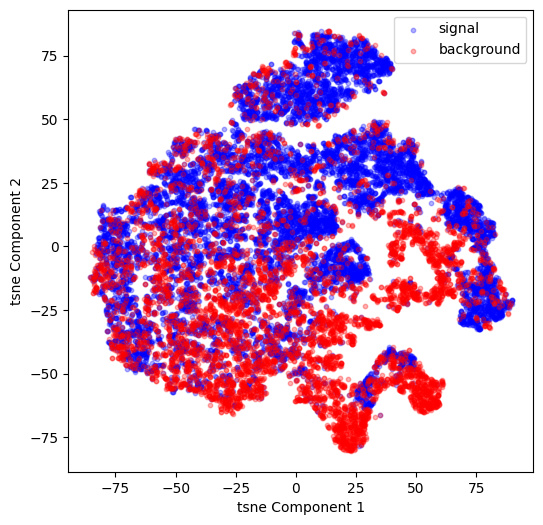

In [ ]:
df_tsne2 = pd.DataFrame(data = tsne2, columns = ['tsne-1', 'tsne-2'])
df_tsne2['label'] = df['label']
signal_tsne2 = df_tsne2[df_tsne2["label"]==1]
background_tsne2 = df_tsne2[df_tsne2["label"]==0]
fig=plt.figure(figsize=(6,6))
plt.scatter(signal_tsne2['tsne-1'], signal_tsne2['tsne-2'], color="blue", label="signal", alpha=0.3, s=10)
plt.scatter(background_tsne2['tsne-1'], background_tsne2['tsne-2'],color="red", label="background", alpha=0.3, s=10)

plt.xlabel("tsne Component 1")
plt.ylabel("tsne Component 2")
plt.legend()

## Perform a multivariate analysis with the technique you prefer and evaluate its performance (e.g. in terms of Area Under the (ROC) Curve)

The purpose of this part is to build some machine learning architectures with the purpose of classifying our data. The comparison between the models will be done through the **ROC curve**. Let's see how does this work: the architecture to be trained, given a sample, must give as output the **probability that that the sample is a signal** (classified as 1). At this point one can fix a **custom threshold probability**, above which data are classified as signals, and under which data are classified as background. For the comparison, we must define the True Positive Rate and the False Positive Rate:

$$
tpr = \frac{\# True Positive}{\#True Positive + \#False Negative}
$$

$$
fpr = \frac{\# False Positive}{\#False Positive + \#True Negative}
$$

that will be analyzed in a graphic. The reason of this analysis is that classifying a background as a signal (i.e., a False Positive) is much worse than doing the inverse. Therefore **our models will be compared looking at the $tpr$ at some values of interest of the $fpr$**.
Lower values of the $fpr$ (and of the $tpr$ also) are achieved raising the threshold: higher the threshold, harder to be classified as an event, less the False Positives but the True Positives as well.

To make this clear:
+ Smaller values on the x-axis of the plot indicate both higher False negatives and True negatives
+ Larger values on the y-axis of the plot indicate both higher true positives and lower false positives.

Unfortunately, choosing custom values of the $fpr$ will not be possible, since these are discrete values coming from the choice of the threshold: we will therefore look at the $tpr$ at values of the $fpr$ as close as possible to the assigned ones.

Finally, the models can be evaluated also looking at the AUC score, i.e. the area under the ROC curve, that can be used as a summary of the model performance and should be as close as possible to one.

In [ ]:
def transform_split(X,Y):
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    Y = Y[permutation]

    # train-test splitting
    train_size = 0.8
    train_len = int(train_size * X.shape[0])

    X_train, X_test = X[:train_len], X[train_len:]
    Y_train, Y_test = Y[:train_len], Y[train_len:]

    # scaling data
    transformer = MinMaxScaler(feature_range=(-1, 1), copy=True)
    transformer.fit(X_train)
    X_train = transformer.transform(X_train)
    X_test = transformer.transform(X_test)

    return X_train, Y_train, X_test, Y_test

In [ ]:
class ROC_Analysis():
    ''' This class holds all the function involving calculations and plots about the ROC curve, such that
    to study different models you just need to create more instances of this object. '''

    def __init__(self, name, true_labels, predictions, fpr_th=[0.01, 0.02, 0.05, 0.1, 0.2], model=None):

        self.name = name
        self.true_labels = true_labels
        self.predictions = predictions
        self.fpr_th = fpr_th

        self.fpr = None
        self.tpr = None
        self.thresholds = None
        self.AUC_score = None

        self.model = model


    def Compute_ROC_Curve(self):
        ''' This function compute the values necessary to study the ROC curve and need to be
        executed called plotting it. '''

        self.fpr, self.tpr, self.thresholds = roc_curve(self.true_labels, self.predictions)
        self.AUC_score = roc_auc_score(self.true_labels, self.predictions)


    def Find_Closest_Parameters(self):
        ''' Return the closest fpr available values to the requested ones '''

        s = len(self.fpr_th)
        closest_fpr, closest_tpr, indexes = np.zeros(s), np.zeros(s), np.zeros(s, dtype=int)

        for ii in range(s):
            indexes[ii] = np.searchsorted(self.fpr, self.fpr_th[ii])

        closest_fpr = self.fpr[indexes]
        closest_tpr = self.tpr[indexes]
        closest_th  = self.thresholds[indexes]

        return (closest_fpr, closest_tpr, closest_th)


    def Plot_ROC_Curve(self, axes=None):

        if self.AUC_score == None: self.Compute_ROC_Curve()

        if axes == None: fig, axes = plt.subplots(figsize=(7,6))
        axes.plot(self.fpr, self.tpr, color="orange", label=self.name+"_ROC")
        axes.plot([0, 1], [0, 1], color="darkblue", linestyle='--', label="Random Guess")

        cl_fpr, cl_tpr, cl_th = self.Find_Closest_Parameters()
        axes.scatter(cl_fpr, cl_tpr, color="red", label="Relevant pts, with thr. values")
        for ii in range(len(self.fpr_th)):
            plt.annotate('%.3f' % cl_th[ii], (cl_fpr[ii], cl_tpr[ii]),
                         xytext=(cl_fpr[ii]+0.03,cl_tpr[ii]-0.02),fontsize=11)

        txt_roc_auc = "roc_auc = %.3f" % self.AUC_score
        props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
        axes.text(0.6, 0.4, txt_roc_auc, transform=axes.transAxes, fontsize=12, verticalalignment='top', bbox=props)

        axes.set_xlabel("False Positive Rate")
        axes.set_ylabel("True Positive Rate")
        axes.set_title("ROC Curve of the " + self.name)
        axes.grid()
        axes.legend()


    def Display_Results(self):
        ''' Create a table to summarize the closes values of fpr and tpr to the thresholds given '''

        if self.AUC_score == None: self.Compute_ROC_Curve()
        cl_fpr, cl_tpr, cl_th = self.Find_Closest_Parameters()

        inf_df = pd.DataFrame(np.vstack((np.array(self.fpr_th), cl_fpr, cl_tpr, cl_th)).round(4))
        inf_df.index = ['values', 'closest_fpr','tpr','threshold']
        inf_df.columns = ['']*5

        return inf_df


In [ ]:
def Retrieve_Best_Model(analysis_objects, verbose=False):
    ''' This function is supposed to receive in input a dictionary of ROC_Analysis objects, and compare them
    using as discriminator the roc_auc value, i.e. the area under their roc curve, and plot them. '''

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Setup comparison plot
    ax[0].plot([0, 1], [0, 1], color="darkblue", linestyle='--', label="Random Guess")
    ax[0].set_xlabel("False Positive Rate")
    ax[0].set_ylabel("True Positive Rate")
    ax[0].set_title("Comparison of different ROC Curves")

    # Variables defined in order to find the maximum of the roc auc values
    best_model = None
    max_auc = 0
    auc_values = []

    for key in analysis_objects:
        analysis_objects[key].Compute_ROC_Curve()
        ax[0].plot(analysis_objects[key].fpr, analysis_objects[key].tpr)
        roc_auc = analysis_objects[key].AUC_score
        auc_values.append(roc_auc)
        if roc_auc > max_auc:
            best_model = analysis_objects[key]
            max_auc = roc_auc

        if verbose:
            print(key, "ROC AUC = ", roc_auc)


    # Setup best model plot
    best_model.Plot_ROC_Curve(axes=ax[1])


    # Add an histogram representing the frequencies of the roc_auc values
    hist_ax = fig.add_axes([0.25, 0.2, 0.2, 0.2])
    hist_ax.hist(auc_values, bins=len(analysis_objects))
    hist_ax.set_yticks([])

    return best_model

# X and Y Spliting

In [ ]:
# Target dimensions
target_height = 30
target_width = 30
target_channels = 1

# Expand features from 10 to fit 30x30 matrix using zero-padding
def preprocess_features(X, target_height, target_width):
    batch_size, feature_dim = X.shape
    padded_dim = target_height * target_width
    assert feature_dim <= padded_dim, "Feature dimension exceeds target matrix size. Adjust target dimensions."

    # Pad with zeros to fit into target dimensions
    padded_X = np.zeros((batch_size, padded_dim))
    padded_X[:, :feature_dim] = X  # Copy the original features

    # Reshape into target height, width, and channel dimensions
    return padded_X.reshape(batch_size, target_height, target_width, target_channels)

# Preprocess the data
X_train_preprocessed = preprocess_features(X_train, target_height, target_width)
X_test_preprocessed = preprocess_features(X_test, target_height, target_width)

# Ensure Y_train and Y_test are in the correct shape for conditions
Y_train_preprocessed = Y_train.reshape(-1, 1)
Y_test_preprocessed = Y_test.reshape(-1, 1)

# Output the shapes for verification
print("X_train_preprocessed shape:", X_train_preprocessed.shape)
print("X_test_preprocessed shape:", X_test_preprocessed.shape)
print("Y_train_preprocessed shape:", Y_train_preprocessed.shape)
print("Y_test_preprocessed shape:", Y_test_preprocessed.shape)


X_train_preprocessed shape: (15216, 30, 30, 1)
X_test_preprocessed shape: (3804, 30, 30, 1)
Y_train_preprocessed shape: (15216, 1)
Y_test_preprocessed shape: (3804, 1)


In [ ]:
# defining features matrix X and labels vector y
X = np.array(df.iloc[:,0:10])
Y = np.array(df.iloc[:,11])
X_train, Y_train, X_test, Y_test = transform_split(X,Y)

In [ ]:
X_train = X_train.reshape(-1, 10, 1, 1)
X_test = X_test.reshape(-1, 10, 1, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
#Y_train = to_categorical(Y_train)
#Y_test = to_categorical(Y_test)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
# one_hot key
#Y_train_one_hot = to_categorical(Y_train, num_classes=2)

-----------------------------------------------------
======================================================================================================
-----------------------------------------------------

# CVAE + CGaN

### **Hybrid Model Overview**

The hybrid model combines two generative architectures: **Conditional Variational Autoencoder (CVAE)** and **Conditional Generative Adversarial Network (CGAN)**. These components work together to analyze, generate, and classify **Cherenkov radiation image data** from the MAGIC telescope. The goal is to distinguish gamma-ray signals (g) from hadronic showers (h) using both physics-based reconstruction and physics-agnostic multivariate analysis.

---

### **1. Why a Hybrid Model?**

Cherenkov radiation images are complex, high-dimensional, and structured. A hybrid model leverages the unique strengths of both CVAE and CGAN:

1. **CVAE**:
   - Learns a probabilistic latent representation of the data.
   - Captures the underlying structure and relationships between image features and auxiliary physical conditions (e.g., particle momentum, position).
   - Can reconstruct original data, useful for interpreting learned features.

2. **CGAN**:
   - Learns to generate realistic images by combining random noise with auxiliary conditions.
   - Improves the quality of generated samples through adversarial training.
   - Helps distinguish between real and synthetic Cherenkov images.

By combining these, the hybrid model:
- Encodes images into a **latent space** for interpretation (CVAE).
- Generates synthetic images for augmentation and modeling (CGAN).
- Provides a discriminator for distinguishing between real and synthetic images.

---

### **2. CVAE (Conditional Variational Autoencoder)**

#### **Purpose**:
- To model the distribution of Cherenkov radiation images and reconstruct them.
- To learn a **latent space** where similar features are grouped, enabling physics-informed analysis.

#### **Components**:
1. **Encoder**:
   - Maps the input image and condition (e.g., particle metadata) to a latent distribution defined by `z_mean` and `z_log_var`.
   - Outputs a probabilistic latent space, ensuring variability in reconstructions.

2. **Latent Space Sampling**:
   - A random sample is drawn from the learned latent distribution.
   - Allows variability in reconstructions, modeling the natural variations in Cherenkov images.

3. **Decoder**:
   - Reconstructs the original image from the sampled latent vector and condition.
   - Ensures that the latent representation retains enough information to recreate the input.

---

### **3. CGAN (Conditional Generative Adversarial Network)**

#### **Purpose**:
- To generate **realistic Cherenkov images** conditioned on auxiliary features (e.g., particle energy, position).
- To differentiate between real (from data) and synthetic (from the generator) images, refining the generator's learning.

#### **Components**:
1. **Generator**:
   - Takes a random noise vector and auxiliary conditions as input.
   - Produces synthetic Cherenkov images by learning patterns in the data.
   - Mimics the characteristics of real gamma-ray and hadronic showers.

2. **Discriminator**:
   - Takes an image (real or synthetic) and auxiliary conditions as input.
   - Outputs a probability indicating whether the image is real or fake.
   - Provides feedback to the generator to improve its ability to create realistic images.

---

### **4. How the Hybrid Model Works**

The hybrid model integrates the CVAE and CGAN components, creating a unified framework for both data reconstruction and generation:

1. **Encoding (CVAE)**:
   - Input Cherenkov images are encoded into a latent space that captures meaningful physical and statistical features.

2. **Decoding (CVAE)**:
   - The latent representation, combined with auxiliary conditions, is decoded back into the original image space.
   - This ensures the latent space retains enough information to recreate the original data.

3. **Image Generation (CGAN)**:
   - The generator uses random noise and auxiliary conditions to create synthetic images.
   - This allows the model to simulate realistic Cherenkov showers, useful for data augmentation or understanding the generative process.

4. **Discrimination (CGAN)**:
   - The discriminator evaluates the quality of the generated images, guiding the generator to improve.

---

### **5. Applications of the Hybrid Model**

1. **Physics-Informed Reconstruction**:
   - The CVAE’s latent space provides a compact representation of the data, enabling feature extraction and interpretation.
   - Helps identify key physical characteristics that distinguish gamma-ray signals from hadronic showers.

2. **Data Augmentation**:
   - The CGAN generates synthetic Cherenkov images, augmenting the dataset to improve classification performance.

3. **Classification**:
   - The discriminator can act as a binary classifier, distinguishing between gamma-ray signals (g) and hadronic showers (h).

4. **Feature Exploration**:
   - The latent space captures the relationships between features, providing insights into the data’s structure.

5. **Error Analysis**:
   - By analyzing incorrectly classified events, researchers can identify overlapping features or limitations in the dataset.

---

### **6. Benefits of the Hybrid Approach**

1. **Data Representation**:
   - The CVAE provides a probabilistic latent space, ensuring variability in reconstructions.
   - The CGAN refines the generator’s ability to model realistic data.

2. **Versatility**:
   - Combines physics-informed (CVAE) and physics-agnostic (CGAN) approaches.
   - Supports both data reconstruction and synthetic data generation.

3. **Improved Performance**:
   - The hybrid model leverages complementary strengths of CVAE and CGAN, improving overall modeling and classification accuracy.

---

### **7. Challenges and Considerations**

1. **Data Imbalance**:
   - Hadronic showers (h) are underrepresented in the dataset. Proper handling, such as rebalancing or weighting, is critical.

2. **Hyperparameter Tuning**:
   - Key parameters like the latent dimension, batch size, and learning rates need careful optimization.

3. **Training Complexity**:
   - Adversarial training (CGAN) requires balancing the generator and discriminator, which can be challenging.

4. **Interpretability**:
   - While the CVAE provides some interpretability via the latent space, the CGAN’s outputs may require further analysis to ensure physical relevance.

---

### **8. Summary of the Hybrid Model**

| **Component**      | **Purpose**                          | **Key Functionality**                                                                                  |
|---------------------|--------------------------------------|--------------------------------------------------------------------------------------------------------|
| **CVAE Encoder**    | Data compression                    | Encodes Cherenkov images into a compact latent space conditioned on auxiliary features.               |
| **CVAE Decoder**    | Data reconstruction                 | Reconstructs images from the latent space and auxiliary features, ensuring retention of key details.  |
| **CGAN Generator**  | Data generation                     | Produces synthetic Cherenkov images by learning patterns from real data.                              |
| **CGAN Discriminator** | Real-vs-fake classification       | Differentiates between real and generated images, refining the generator’s learning.                  |

This hybrid approach is well-suited for distinguishing gamma-ray signals from hadronic showers, providing both a robust classification framework and insights into the underlying data structure.


### References

 - Fedor Sergeev et al 2021 J. Phys.: Conf. Ser. 1740 012028 [https://doi.org/10.1088/1742-6596/1740/1/012028]

 - Chisholm, Andrew, et al. "Non-parametric data-driven background modelling using conditional probabilities." Journal of High Energy Physics 2022.10 (2022): 1-34.
 [https://doi.org/10.48550/arXiv.2112.00650]


In [ ]:
# Define the Encoder for CVAE
def build_encoder(input_shape, condition_shape, latent_dim):
    inputs = layers.Input(shape=input_shape, name="energy_distribution")
    condition = layers.Input(shape=condition_shape, name="condition")

    x = layers.Conv2D(32, (3, 3), strides=(2, 2), activation="relu")(inputs)
    x = layers.Conv2D(64, (3, 3), strides=(2, 2), activation="relu")(x)
    x = layers.Flatten()(x)
    x = layers.Concatenate()([x, condition])

    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

    return models.Model([inputs, condition], [z_mean, z_log_var], name="encoder")

# Define the Decoder for CVAE
def build_decoder(latent_dim, condition_shape, output_shape):
    latent_inputs = layers.Input(shape=(latent_dim,), name="latent_input")
    condition = layers.Input(shape=condition_shape, name="condition")

    x = layers.Concatenate()([latent_inputs, condition])
    x = layers.Dense(7 * 7 * 64, activation="relu")(x)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), activation="relu", padding="same")(x)
    outputs = layers.Conv2DTranspose(output_shape[-1], (3, 3), activation="sigmoid", padding="same")(x)

    return models.Model([latent_inputs, condition], outputs, name="decoder")

# Define the Generator for CGAN
def build_generator(input_dim, condition_shape, output_shape):
    latent_inputs = layers.Input(shape=(input_dim,), name="noise")
    condition = layers.Input(shape=condition_shape, name="condition")

    x = layers.Concatenate()([latent_inputs, condition])
    x = layers.Dense(7 * 7 * 64, activation="relu")(x)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), activation="relu", padding="same")(x)
    outputs = layers.Conv2DTranspose(output_shape[-1], (3, 3), activation="sigmoid", padding="same")(x)

    return models.Model([latent_inputs, condition], outputs, name="generator")

# Define the Discriminator for CGAN
def build_discriminator(input_shape, condition_shape):
    inputs = layers.Input(shape=input_shape, name="generated_or_real")
    condition = layers.Input(shape=condition_shape, name="condition")

    x = layers.Conv2D(32, (3, 3), strides=(2, 2), activation="relu")(inputs)
    x = layers.Conv2D(64, (3, 3), strides=(2, 2), activation="relu")(x)
    x = layers.Flatten()(x)
    x = layers.Concatenate()([x, condition])
    outputs = layers.Dense(1, activation="sigmoid")(x)

    return models.Model([inputs, condition], outputs, name="discriminator")

# Build and integrate the CVAE+CGAN model
def build_hybrid_model(input_shape, condition_shape, latent_dim):
    encoder = build_encoder(input_shape, condition_shape, latent_dim)
    decoder = build_decoder(latent_dim, condition_shape, input_shape)
    generator = build_generator(latent_dim, condition_shape, input_shape)
    discriminator = build_discriminator(input_shape, condition_shape)

    # Hybrid CVAE+CGAN Model
    return {
        "encoder": encoder,
        "decoder": decoder,
        "generator": generator,
        "discriminator": discriminator
    }

# Example Usage
input_shape = (30, 30, 1)  # Energy distribution matrix
condition_shape = (5,)     # Example condition vector (e.g., particle momentum and coordinates)
latent_dim = 100

hybrid_model = build_hybrid_model(input_shape, condition_shape, latent_dim)

# Summary of sub-models
hybrid_model["encoder"].summary()
hybrid_model["decoder"].summary()
hybrid_model["generator"].summary()
hybrid_model["discriminator"].summary()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ energy_distribution       │ (None, 30, 30, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 14, 14, 32)     │            320 │ energy_distribution[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 6, 6, 64)       │         18,496 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 2304)           │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ condition (InputLayer)    │ (None, 5)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_16            │ (None, 2309)           │              0 │ flatten[0][0],         │
│ (Concatenate)             │                        │                │ condition[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_mean (Dense)            │ (None, 100)            │        231,000 │ concatenate_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_log_var (Dense)         │ (None, 100)            │        231,000 │ concatenate_16[0][0]   │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 480,816 (1.83 MB)

 Trainable params: 480,816 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ latent_input (InputLayer) │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ condition (InputLayer)    │ (None, 5)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_17            │ (None, 105)            │              0 │ latent_input[0][0],    │
│ (Concatenate)             │                        │                │ condition[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_44 (Dense)          │ (None, 3136)           │        332,416 │ concatenate_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 7, 7, 64)       │              0 │ dense_44[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 14, 14, 64)     │         36,928 │ reshape[0][0]          │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 28, 28, 32)     │         18,464 │ conv2d_transpose[0][0] │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_2        │ (None, 28, 28, 1)      │            289 │ conv2d_transpose_1[0]… │
│ (Conv2DTranspose)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 388,097 (1.48 MB)

 Trainable params: 388,097 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ noise (InputLayer)        │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ condition (InputLayer)    │ (None, 5)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_18            │ (None, 105)            │              0 │ noise[0][0],           │
│ (Concatenate)             │                        │                │ condition[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_45 (Dense)          │ (None, 3136)           │        332,416 │ concatenate_18[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 7, 7, 64)       │              0 │ dense_45[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_3        │ (None, 14, 14, 64)     │         36,928 │ reshape_1[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_4        │ (None, 28, 28, 32)     │         18,464 │ conv2d_transpose_3[0]… │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_5        │ (None, 28, 28, 1)      │            289 │ conv2d_transpose_4[0]… │
│ (Conv2DTranspose)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 388,097 (1.48 MB)

 Trainable params: 388,097 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ generated_or_real         │ (None, 30, 30, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 14, 14, 32)     │            320 │ generated_or_real[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 6, 6, 64)       │         18,496 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 2304)           │              0 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ condition (InputLayer)    │ (None, 5)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_19            │ (None, 2309)           │              0 │ flatten_1[0][0],       │
│ (Concatenate)             │                        │                │ condition[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_46 (Dense)          │ (None, 1)              │          2,310 │ concatenate_19[0][0]   │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 21,126 (82.52 KB)

 Trainable params: 21,126 (82.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model with accuracy metric
cvae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate_cvae), metrics=['accuracy'])

# Train the model and track history
history = cvae.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, X_test), callbacks=[checkpoint], verbose=1)

# Extract the model's training and validation metrics
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Safely get accuracy if it's available
train_accuracy = history.history.get('accuracy', [])
val_accuracy = history.history.get('val_accuracy', [])

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_loss, label='Train Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy (if tracked)
if train_accuracy:
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), train_accuracy, label='Train Accuracy')
    plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()
    plt.show()


119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1892
           1       0.50      1.00      0.67      1912

    accuracy                           0.50      3804
   macro avg       0.25      0.50      0.33      3804
weighted avg       0.25      0.50      0.34      3804

Confusion Matrix:
[[   0 1892]
 [   0 1912]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


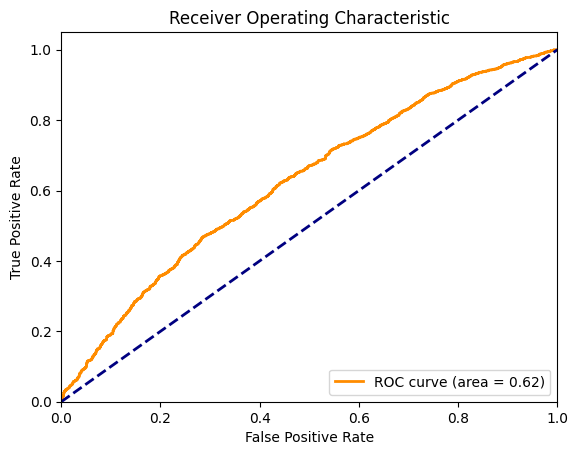

In [ ]:
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def evaluate_model_performance(model, X_test, Y_test):
    y_scores = model.predict([X_test, Y_test]).ravel()
    y_pred = (y_scores > 0.5).astype(int)

    # Convert Y_test to binary format if it's not already
    if Y_test.ndim > 1:
        y_true = (Y_test[:, 0] > 0.5).astype(int)
    else:
        y_true = (Y_test > 0.5).astype(int)

    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    plot_roc_curve(y_true, y_scores)


discriminator = hybrid_model["discriminator"]
evaluate_model_performance(discriminator, X_test, Y_test)


In [ ]:
input_shape = (10,)
condition_shape = (1,)
latent_dim = 10

learning_rate_cvae = 0.0005
learning_rate_cgan_gen = 0.0001
learning_rate_cgan_disc = 0.0004
epochs = 50

hybrid_model = build_hybrid_model(input_shape, condition_shape, latent_dim)
train_hybrid_model(hybrid_model, X_train, Y_train, X_test, Y_test, epochs=100, batch_size=512)

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def evaluate_model_performance(model, X_test, Y_test):
    y_scores = model.predict([X_test, Y_test]).ravel()
    y_pred = (y_scores > 0.5).astype(int)

    # Convert Y_test to binary format if it's not already
    if Y_test.ndim > 1:
        y_true = (Y_test[:, 0] > 0.5).astype(int)
    else:
        y_true = (Y_test > 0.5).astype(int)

    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    plot_roc_curve(y_true, y_scores)


discriminator = hybrid_model["discriminator"]
evaluate_model_performance(discriminator, X_test, Y_test)

## Fine-Tuning

### Fine-Tuning the Hybrid Generative Model

Fine-tuning involves optimizing the performance of both the encoder-decoder architecture and the adversarial components of the model. The key steps include:

1. **Early Stopping**:
   - Implement an early stopping mechanism (e.g., `EarlyStoppingByLoss`) to halt training when the validation loss stops improving. This helps prevent overfitting and reduces unnecessary training time.

2. **Model Save/Load Functions**:
   - Use modular functions to save and load the encoder, decoder, generator, and discriminator models along with their corresponding hyperparameters for future use or fine-tuning.

3. **Incremental Training**:
   - Train the CVAE to minimize the reconstruction loss and KL divergence using batches of training data.
   - Train the CGAN discriminator to differentiate between real and generated data, while simultaneously training the generator to produce data indistinguishable from real samples.

4. **Validation and Checkpointing**:
   - At each epoch, validate the model and compute a combined loss metric (e.g., CVAE loss + discriminator loss + generator loss).
   - Save the model and its hyperparameters whenever a new best validation loss is observed.

5. **Performance Evaluation**:
   - Evaluate the model's predictive performance using classification metrics (e.g., confusion matrix, classification report).
   - Visualize results with a Receiver Operating Characteristic (ROC) curve and compute the Area Under the Curve (AUC) to assess discriminative ability.

In [ ]:
# Hyperparameters
latent_dim = 10  # Latent space dimension
batch_size = 512
learning_rate_cvae = 5e-4
learning_rate_cgan_gen = 1e-4
learning_rate_cgan_disc = 4e-4
epochs = 50

# Save hyperparameters to a JSON file
hyperparameters = {
    "latent_dim": latent_dim,
    "batch_size": batch_size,
    "learning_rate_cvae": learning_rate_cvae,
    "learning_rate_cgan_gen": learning_rate_cgan_gen,
    "learning_rate_cgan_disc": learning_rate_cgan_disc,
    "epochs": epochs
}

with open('hyperparameters.json', 'w') as f:
    json.dump(hyperparameters, f)

# CVAE Encoder
def build_encoder(input_dim):
    inputs = Input(shape=(input_dim,))
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)
    return Model(inputs, [z_mean, z_log_var], name="encoder")

# CVAE Decoder
def build_decoder(output_dim):
    latent_inputs = Input(shape=(latent_dim,))
    x = layers.Dense(32, activation='relu')(latent_inputs)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(output_dim)(x)
    return Model(latent_inputs, outputs, name="decoder")

# Sampling layer
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# CVAE Loss
class CVAELossLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(CVAELossLayer, self).__init__(**kwargs)

    def call(self, inputs):
        x, x_recon, z_mean, z_log_var = inputs
        reconstruction_loss = tf.reduce_mean(tf.square(x - x_recon))
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        self.add_loss(reconstruction_loss + kl_loss)
        return x_recon

# Build CVAE
input_dim = 10  # Adjust for X_train.shape[1]
encoder = build_encoder(input_dim)
decoder = build_decoder(input_dim)
# CVAE Architecture with custom loss
z_mean, z_log_var = encoder.output
z = Sampling()([z_mean, z_log_var])
x_recon = decoder(z)

# Add custom loss
outputs = CVAELossLayer()([encoder.input, x_recon, z_mean, z_log_var])

# Define the CVAE model
cvae = Model(encoder.input, outputs, name="CVAE")
cvae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate_cvae))

# CGAN Generator
def build_generator(input_dim):
    inputs = Input(shape=(input_dim + latent_dim,))  # Combined input shape
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(input_dim)(x)
    return Model(inputs, outputs, name="generator")

# CGAN Discriminator
def build_discriminator(input_dim):
    inputs = Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    return Model(inputs, outputs, name="discriminator")

# Build CGAN
generator = build_generator(input_dim)
discriminator = build_discriminator(input_dim)
discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate_cgan_disc), loss='binary_crossentropy', metrics=['accuracy'])

# Combined CGAN Model
discriminator.trainable = False
z_cgan = Input(shape=(latent_dim,))
conditional_input = Input(shape=(input_dim,))
gen_input = layers.Concatenate()([z_cgan, conditional_input])
generated_data = generator(gen_input)
validity = discriminator(generated_data)
cgan = Model([z_cgan, conditional_input], validity, name="CGAN")
cgan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate_cgan_gen), loss='binary_crossentropy')

# Define ModelCheckpoint callback to save the best model based on validation loss
#checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Training Process
history = []  # To store the training history

for epoch in range(epochs):
    cvae_history = cvae.fit(X_train, X_train, batch_size=batch_size, epochs=1, verbose=0, validation_data=(X_test, X_test), callbacks=[checkpoint])

    # Store the history of the CVAE training
    history.append(cvae_history.history)

    # Generate latent vectors using CVAE
    z_train, _ = encoder.predict(X_train)
    z_test, _ = encoder.predict(X_test)

    # Train CGAN Discriminator
    z_random = tf.random.normal((batch_size, latent_dim))
    gen_input = tf.concat([z_random, X_train[:batch_size]], axis=1)  # Concatenate inputs
    fake_data = generator.predict(gen_input)
    real_labels = tf.ones((batch_size, 1))
    fake_labels = tf.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(X_train[:batch_size], real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train CGAN Generator
    misleading_labels = tf.ones((batch_size, 1))
    g_loss = cgan.train_on_batch([z_random, X_train[:batch_size]], misleading_labels)

    print(f"Epoch {epoch + 1}/{epochs}, CVAE Loss: {float(cvae.history.history['loss'][-1]):.4f}")

# Save the history of the training process to a file
with open('training_history.json', 'w') as f:
    json.dump(history, f)

# Optionally, plot the training history for visual inspection:
losses = [h['loss'] for h in history]
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
# Early stopping callback
class EarlyStoppingByLoss(tf.keras.callbacks.Callback):
    def __init__(self, patience=5):
        super(EarlyStoppingByLoss, self).__init__()
        self.patience = patience
        self.best_loss = np.Inf
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get("loss")
        if current_loss is None:
            return
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                print(f"Stopping early at epoch {epoch+1}")
                self.model.stop_training = True

# Save model and hyperparameters
def save_model_and_params(hybrid_model, params, model_dir, params_path):
    os.makedirs(model_dir, exist_ok=True)
    for name, model in hybrid_model.items():
        model_path = os.path.join(model_dir, f"{name}.keras")
        model.save(model_path)
    with open(params_path, "wb") as f:
        pickle.dump(params, f)

# Load all sub-models and hyperparameters
def load_model_and_params(model_dir, params_path):
    hybrid_model = {}
    for model_file in os.listdir(model_dir):
        if model_file.endswith(".keras"):
            model_name = model_file.replace(".keras", "")
            model_path = os.path.join(model_dir, model_file)
            hybrid_model[model_name] = tf.keras.models.load_model(model_path)
    with open(params_path, "rb") as f:
        params = pickle.load(f)
    return hybrid_model, params

# Fine-tune hybrid model
def fine_tune_and_save(hybrid_model, X_train, Y_train, X_test, Y_test, epochs=100, batch_size=64):
    encoder = hybrid_model["encoder"]
    decoder = hybrid_model["decoder"]
    generator = hybrid_model["generator"]
    discriminator = hybrid_model["discriminator"]

    cvae = compile_cvae(encoder, decoder, X_train.shape[1:], Y_train.shape[1:], latent_dim)
    cgan = compile_cgan(generator, discriminator)

    best_val_loss = np.Inf
    best_hyperparams = None
    model_dir = "best_model"  # Directory for saving sub-models
    hyperparams_path = "best_hyperparams.pkl"

    for epoch in range(epochs):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        conditions = Y_train[idx]

        # Train CVAE
        cvae_loss = cvae.train_on_batch([imgs, conditions], None)

        # Train Discriminator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_imgs = generator.predict([noise, conditions])
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        d_loss_real = discriminator.train_on_batch([imgs, conditions], valid)
        d_loss_fake = discriminator.train_on_batch([gen_imgs, conditions], fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        g_loss = cgan.train_on_batch([noise, conditions], valid)

        # Validate performance
        val_loss = np.mean(cvae_loss + d_loss[0] + g_loss)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_hyperparams = {
                "epoch": epoch + 1,
                "batch_size": batch_size,
                "latent_dim": latent_dim,
                "val_loss": val_loss
            }
            save_model_and_params(hybrid_model, best_hyperparams, model_dir, hyperparams_path)

        print(f"Epoch {epoch+1}/{epochs}, CVAE Loss: {cvae_loss:.4f}, D Loss: {d_loss[0]:.4f}, G Loss: {g_loss:.4f}, Val Loss: {val_loss:.4f}")

    print(f"Best model saved with validation loss: {best_val_loss}")
    return model_dir, hyperparams_path

# Evaluate model performance
def evaluate_and_visualize(model, X_test, Y_test):
    y_scores = model.predict([X_test, Y_test]).ravel()
    y_pred = (y_scores > 0.5).astype(int)

    y_true = (Y_test > 0.5).astype(int)

    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Define the hyperparameter search space and build the model
def build_model(hp):
    latent_dim = hp.Int('latent_dim', min_value=50, max_value=200, step=50)
    input_shape = (10,)
    condition_shape = (1,)

    # Build the discriminator only
    discriminator = build_discriminator(input_shape, condition_shape)
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return discriminator

# Create the tuner instance
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,             # Number of hyperparameter combinations to try
    executions_per_trial=2,    # Average the results over 2 trials
    directory='hyperparameter_tuning',
    project_name='discriminator_tuning'
)

# Reshape Y_train and Y_test for condition
Y_train_reshaped = Y_train.reshape(-1, 1)
Y_test_reshaped = Y_test.reshape(-1, 1)

# Add batch_size to the hyperparameter search
batch_size_options = [32, 64, 128]  # Define possible batch sizes

# Perform the hyperparameter search
for batch_size in batch_size_options:
    print(f"Testing with batch size: {batch_size}")
    tuner.search(
        [X_train, Y_train_reshaped],  # Pass the inputs as a list
        Y_train_reshaped,
        epochs=10,
        validation_data=([X_test, Y_test_reshaped], Y_test_reshaped),
        batch_size=batch_size  # Set the current batch size
    )

# Retrieve the best model and hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

print(f"Best latent_dim: {best_hps.get('latent_dim')}")
best_batch_size = best_hps.values.get('batch_size', 'Batch size determined manually.')
print(f"Best batch_size: {best_batch_size}")
best_model.summary()

Reloading Tuner from hyperparameter_tuning/discriminator_tuning/tuner0.json
Testing with batch size: 32
Testing with batch size: 64
Testing with batch size: 128
Best latent_dim: 100
Best batch_size: Batch size determined manually.


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ generated_or_real         │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │            704 │ generated_or_real[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │          8,320 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ condition (InputLayer)    │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 129)            │              0 │ dense_1[0][0],         │
│                           │                        │                │ condition[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │            130 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,154 (35.76 KB)

 Trainable params: 9,154 (35.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early stopping callback
class EarlyStoppingByLoss(tf.keras.callbacks.Callback):
    def __init__(self, patience=5):
        super(EarlyStoppingByLoss, self).__init__()
        self.patience = patience
        self.best_loss = np.Inf
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get("loss")
        if current_loss is None:
            return
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                print(f"Stopping early at epoch {epoch+1}")
                self.model.stop_training = True

# Save model and hyperparameters
def save_model_and_params(hybrid_model, params, model_dir, params_path):
    os.makedirs(model_dir, exist_ok=True)
    for name, model in hybrid_model.items():
        model_path = os.path.join(model_dir, f"{name}.keras")
        model.save(model_path)
    with open(params_path, "wb") as f:
        pickle.dump(params, f)

# Load all sub-models and hyperparameters
def load_model_and_params(model_dir, params_path):
    hybrid_model = {}
    for model_file in os.listdir(model_dir):
        if model_file.endswith(".keras"):
            model_name = model_file.replace(".keras", "")
            model_path = os.path.join(model_dir, model_file)
            hybrid_model[model_name] = tf.keras.models.load_model(model_path)
    with open(params_path, "rb") as f:
        params = pickle.load(f)
    return hybrid_model, params

# Fine-tune hybrid model
def fine_tune_and_save(hybrid_model, X_train, Y_train, X_test, Y_test, epochs=100, batch_size=64):
    encoder = hybrid_model["encoder"]
    decoder = hybrid_model["decoder"]
    generator = hybrid_model["generator"]
    discriminator = hybrid_model["discriminator"]

    cvae = compile_cvae(encoder, decoder, X_train.shape[1:], Y_train.shape[1:], latent_dim)
    cgan = compile_cgan(generator, discriminator)

    best_val_loss = np.Inf
    best_hyperparams = None
    best_model_path = "best_model.keras"
    hyperparams_path = "best_hyperparams.pkl"

    for epoch in range(epochs):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        conditions = Y_train[idx]

        # Train CVAE
        cvae_loss = cvae.train_on_batch([imgs, conditions], None)

        # Train Discriminator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_imgs = generator.predict([noise, conditions])
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        d_loss_real = discriminator.train_on_batch([imgs, conditions], valid)
        d_loss_fake = discriminator.train_on_batch([gen_imgs, conditions], fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        g_loss = cgan.train_on_batch([noise, conditions], valid)

        # Validate performance
        val_loss = np.mean(cvae_loss + d_loss[0] + g_loss)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_hyperparams = {
                "epoch": epoch + 1,
                "batch_size": batch_size,
                "latent_dim": latent_dim,
                "val_loss": val_loss
            }
            save_model_and_params(hybrid_model, best_hyperparams, best_model_path, hyperparams_path)

        #print(f"Epoch {epoch+1}/{epochs}, CVAE Loss: {cvae_loss:.4f}, D Loss: {d_loss[0]:.4f}, G Loss: {g_loss:.4f}, Val Loss: {val_loss:.4f}")
        print(f"Epoch {epoch+1}/{epochs}, CVAE Loss: {cvae_loss:.4f}")

    print(f"Best model saved with validation loss: {best_val_loss}")
    return best_model_path, hyperparams_path

# Evaluate model performance
def evaluate_and_visualize(model, X_test, Y_test):
    y_scores = model.predict([X_test, Y_test]).ravel()
    y_pred = (y_scores > 0.5).astype(int)

    y_true = (Y_test > 0.5).astype(int)

    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Fine-tune, save, and visualize results
input_shape = (10,)
condition_shape = (1,)
latent_dim = 100
best_batch_size = 64
n_epochs = 20
hybrid_model = build_hybrid_model(input_shape, condition_shape, latent_dim)
best_model_path, best_params_path = fine_tune_and_save(hybrid_model, X_train, Y_train, X_test, Y_test, epochs=n_epochs, batch_size=best_batch_size)

discriminator = hybrid_model["discriminator"]
evaluate_and_visualize(discriminator, X_test, Y_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

       π (0)       1.00      0.06      0.12      1328
       γ (1)       0.67      1.00      0.80      2476

    accuracy                           0.67      3804
   macro avg       0.83      0.53      0.46      3804
weighted avg       0.78      0.67      0.56      3804

Confusion Matrix:


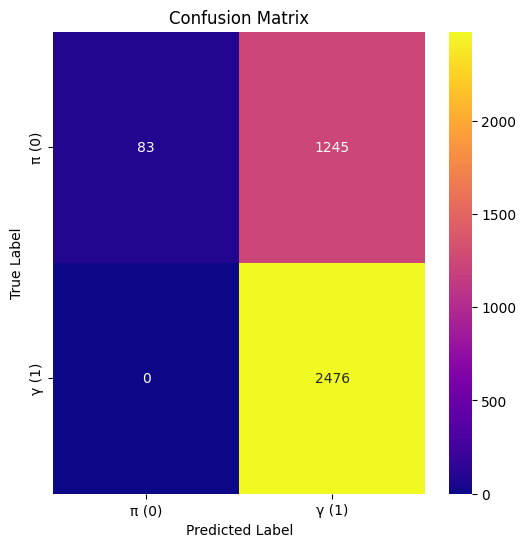

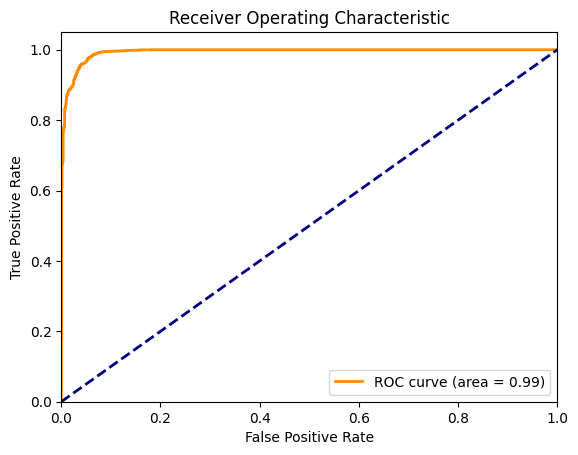

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels=None):
    """
    Plots a confusion matrix using Seaborn's heatmap.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_curve(y_true, y_scores):
    """
    Plots the Receiver Operating Characteristic (ROC) curve.
    """
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

def evaluate_and_visualize_model(model, X_test, Y_test):
    """
    Evaluates the model and visualizes its performance.
    """
    # Make predictions
    y_scores = model.predict([X_test, Y_test]).ravel()
    y_pred = (y_scores > 0.5).astype(int)

    # Convert Y_test to binary if not already
    if Y_test.ndim > 1:
        y_true = (Y_test[:, 0] > 0.5).astype(int)
    else:
        y_true = (Y_test > 0.5).astype(int)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['π (0)', 'γ (1)']))

    # Confusion Matrix
    print("Confusion Matrix:")
    plot_confusion_matrix(y_true, y_pred, labels=['π (0)', 'γ (1)'])

    # ROC Curve
    plot_roc_curve(y_true, y_scores)

# Evaluate and visualize the discriminator model
evaluate_and_visualize_model(discriminator, X_test, Y_test)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Visualizing parameter relationships...


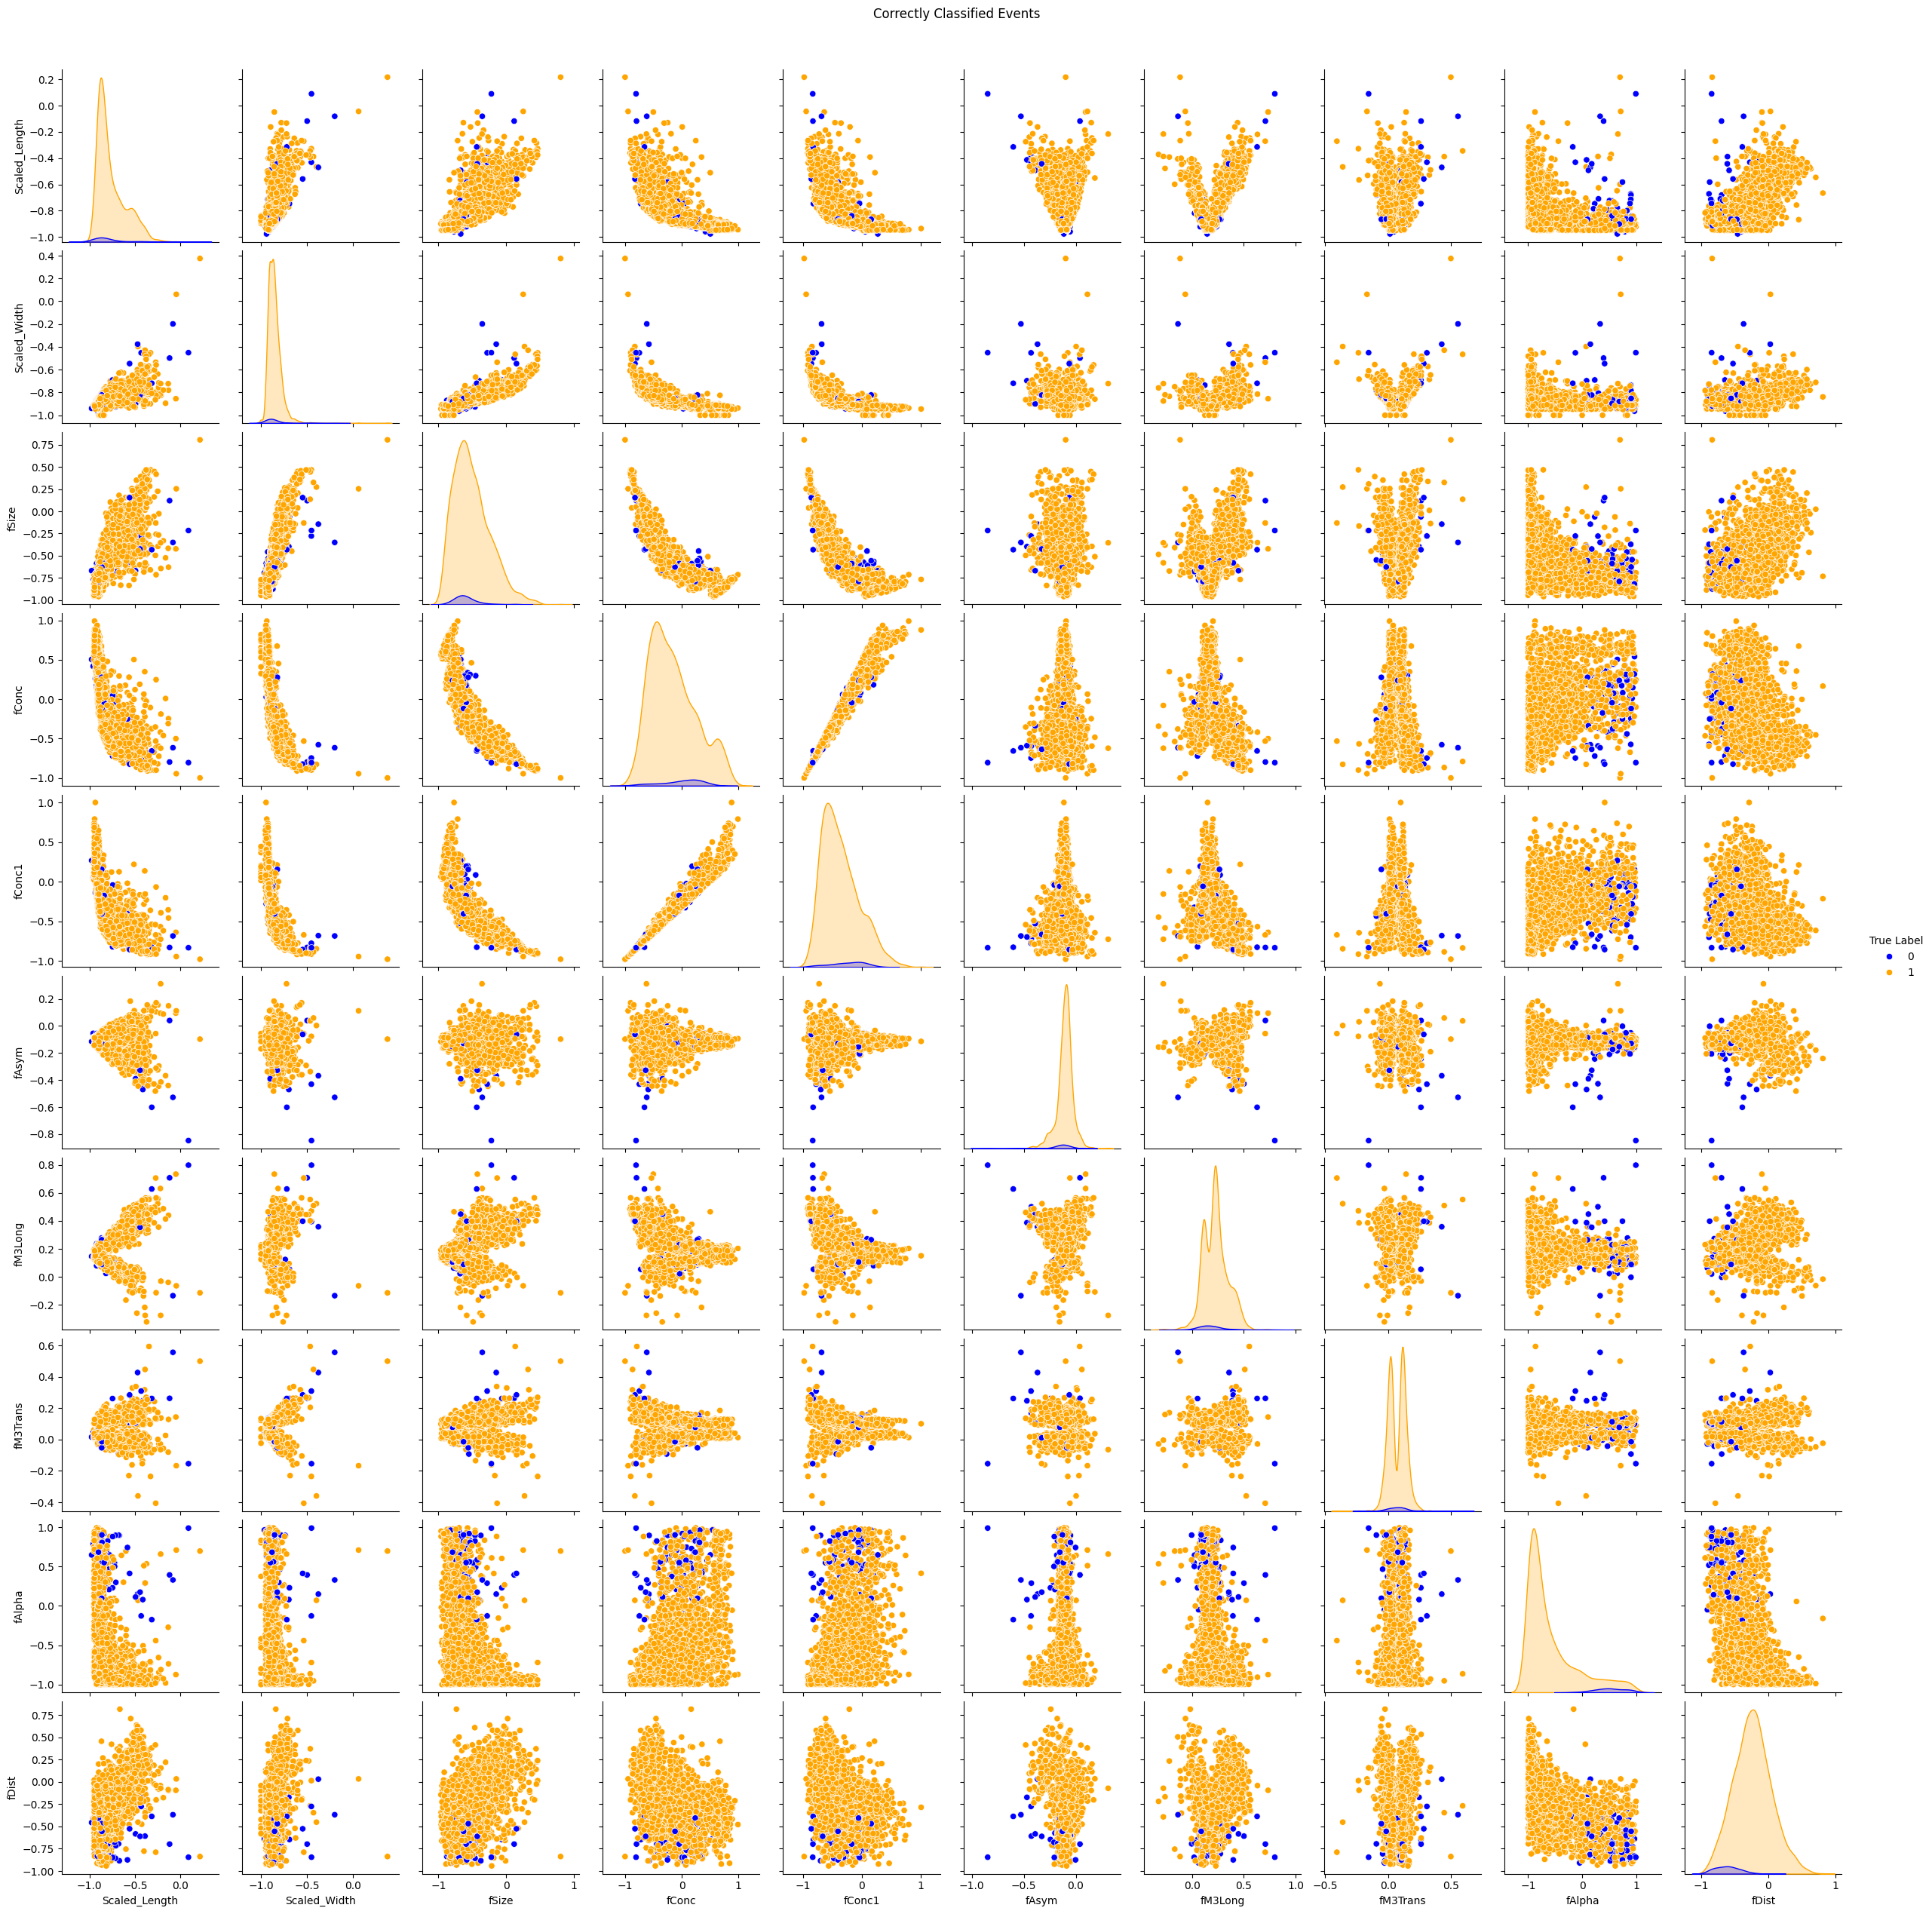

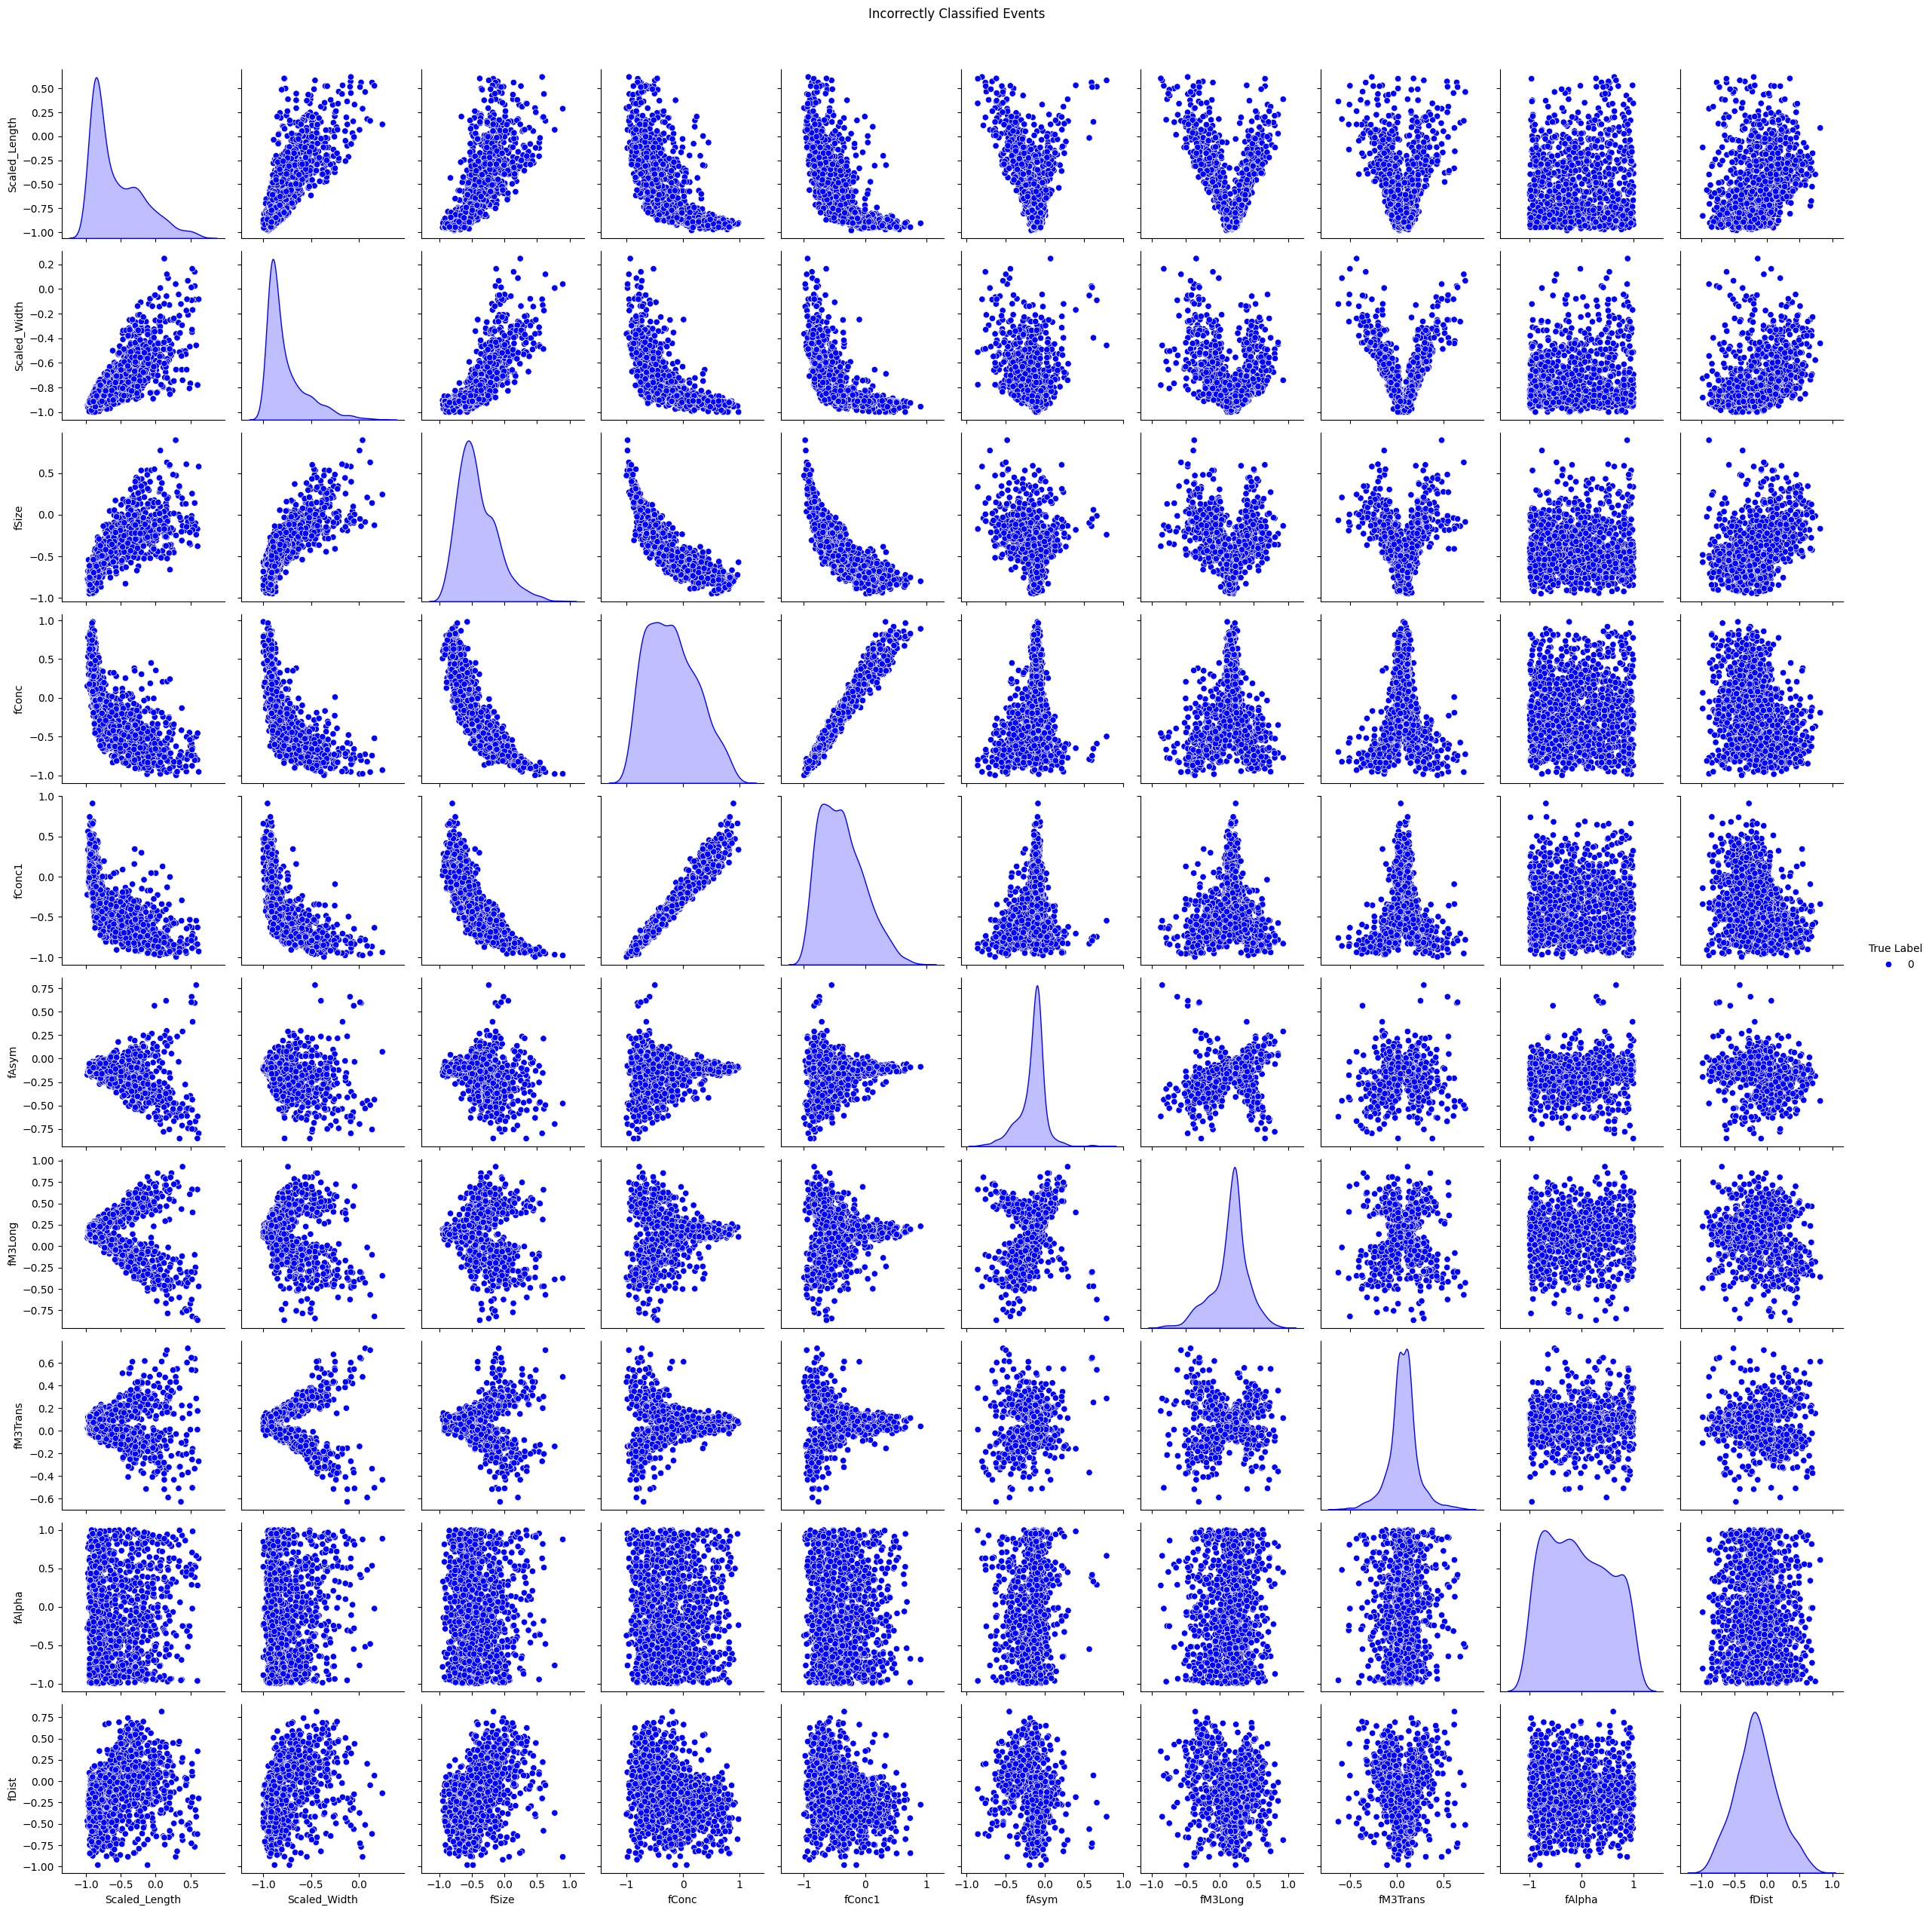

Visualizing parameter distributions...


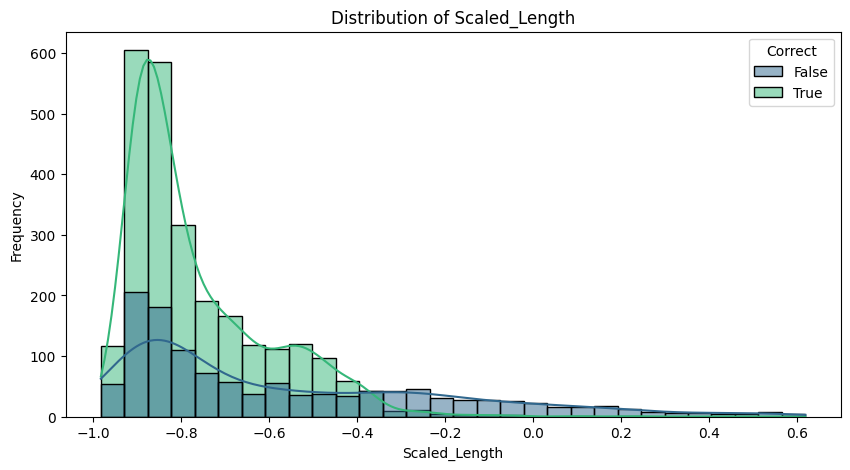

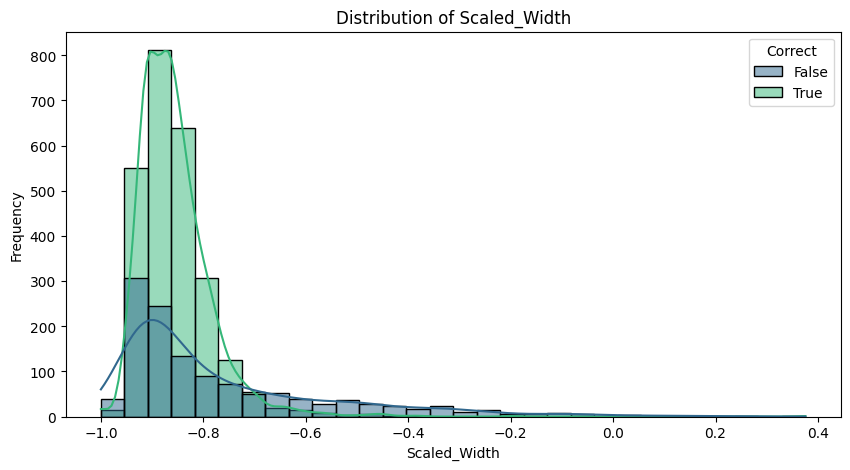

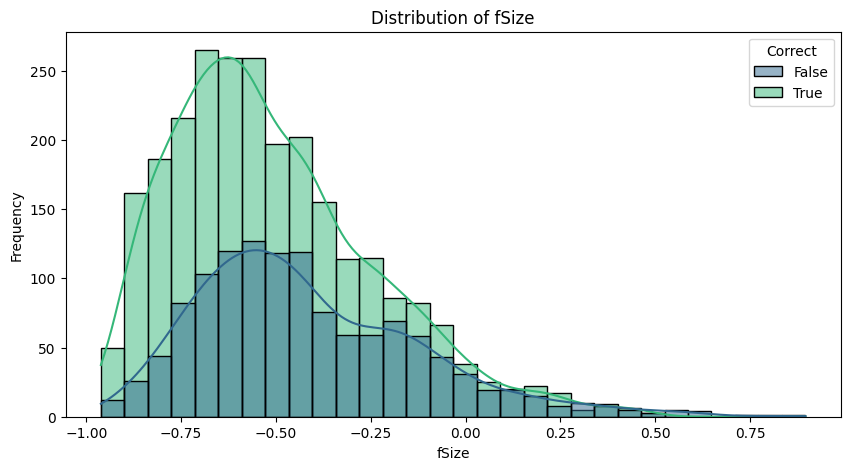

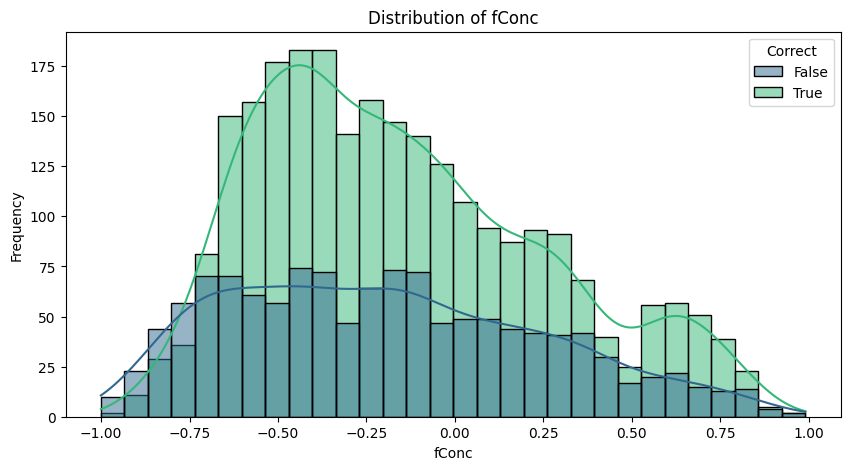

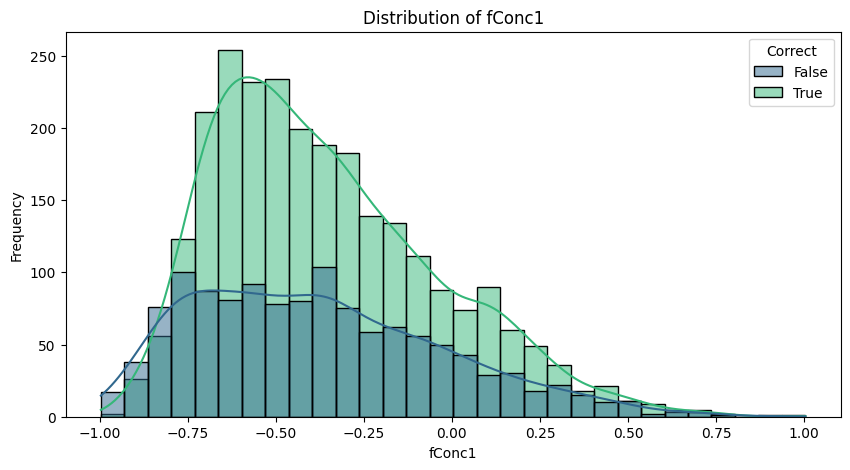

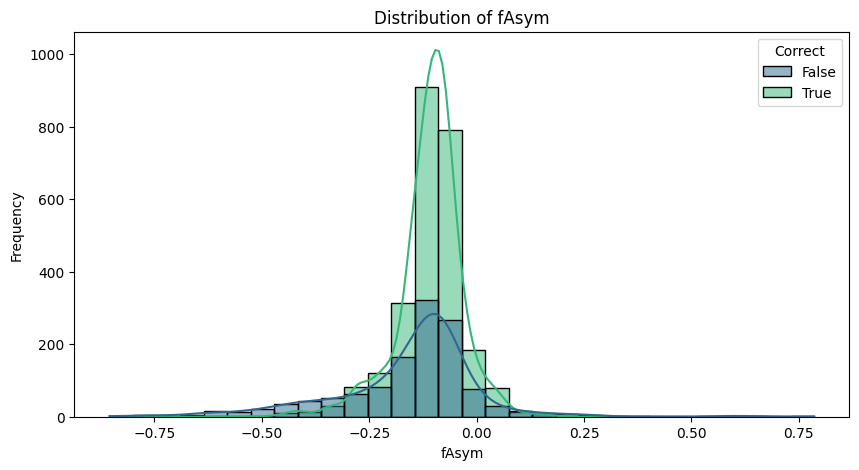

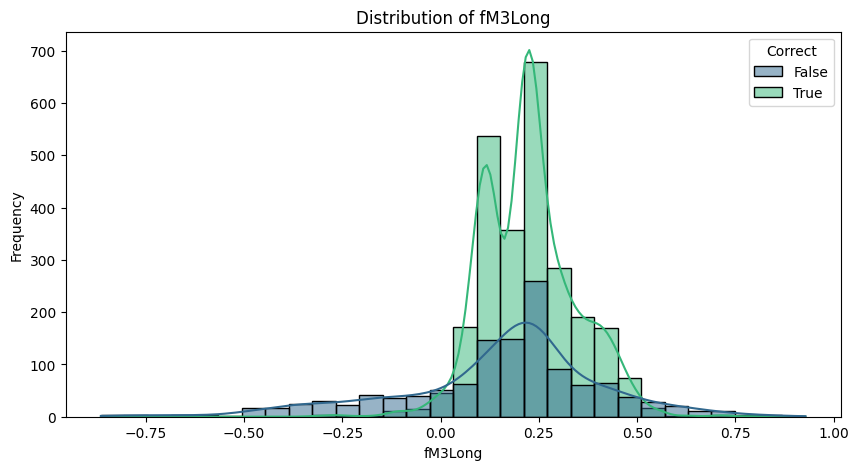

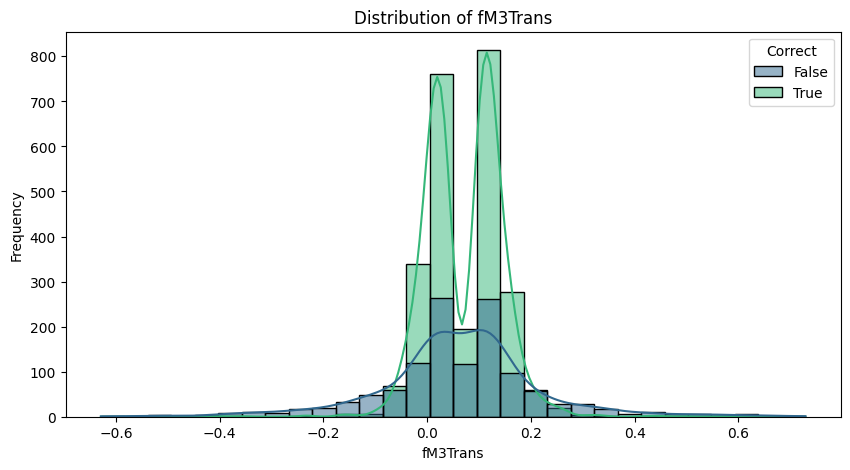

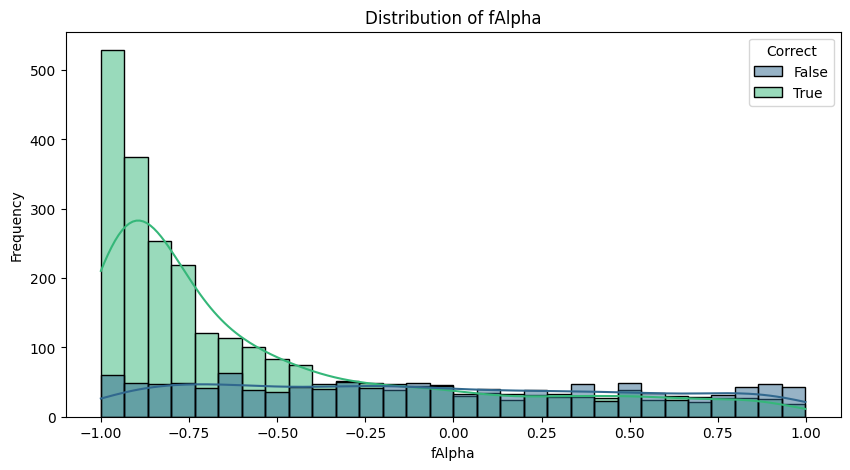

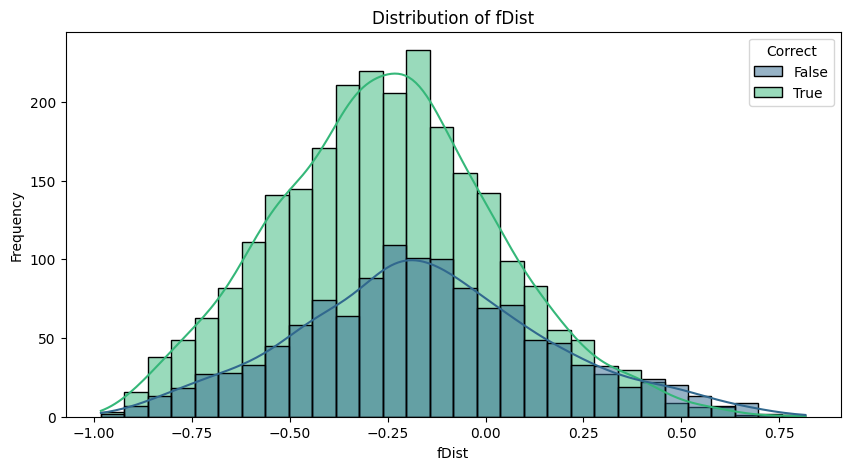

In [ ]:
def plot_parameterization(X_test, Y_test, y_pred, feature_names, labels):
    """
    Visualizes image parameterization for correctly and incorrectly classified events.
    """
    # Convert test data to DataFrame for easy visualization
    df_test = pd.DataFrame(X_test, columns=feature_names)
    df_test['True Label'] = Y_test
    df_test['Predicted Label'] = y_pred
    df_test['Correct'] = (df_test['True Label'] == df_test['Predicted Label'])

    # Separate correctly and incorrectly classified events
    correct_events = df_test[df_test['Correct']]
    incorrect_events = df_test[~df_test['Correct']]

    # Pairplot to visualize parameter relationships
    print("Visualizing parameter relationships...")
    sns.pairplot(correct_events, vars=feature_names, hue="True Label", palette={0: "blue", 1: "orange"})
    plt.suptitle("Correctly Classified Events", y=1.02)
    plt.show()

    sns.pairplot(incorrect_events, vars=feature_names, hue="True Label", palette={0: "blue", 1: "orange"})
    plt.suptitle("Incorrectly Classified Events", y=1.02)
    plt.show()

    # Distribution of key parameters
    print("Visualizing parameter distributions...")
    for feature in feature_names:
        plt.figure(figsize=(10, 5))
        sns.histplot(data=df_test, x=feature, hue='Correct', kde=True, palette="viridis", bins=30)
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()

# Predict using the discriminator
y_scores = discriminator.predict([X_test, Y_test]).ravel()
y_pred = (y_scores > 0.5).astype(int)

# Feature names from the original dataset (scaled)
feature_names = ['Scaled_Length', 'Scaled_Width', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']

# Convert Y_test to binary if necessary
if Y_test.ndim > 1:
    Y_test_binary = (Y_test[:, 0] > 0.5).astype(int)
else:
    Y_test_binary = (Y_test > 0.5).astype(int)

# Demonstrate image parameterization
plot_parameterization(X_test, Y_test_binary, y_pred, feature_names, labels=['hadronic_shower(π)', 'gamma_ray(γ)'])


### Parameterization Analysis

The `plot_parameterization` function provides an in-depth visual analysis of the relationships and distributions of input features (`feature_names`) based on the classification results. It focuses on highlighting correctly and incorrectly classified events in the test set:

1. **Pairwise Feature Relationships**:
   - **Correctly Classified Events**: Displays pairwise scatterplots of features for events that were accurately classified, colored by their true labels (e.g., hadronic showers or gamma rays).
   - **Incorrectly Classified Events**: Similarly, scatterplots are generated for events that were misclassified, showcasing how parameterization differs between correct and incorrect predictions.

2. **Feature Distributions**:
   - Visualizes the distribution of individual features, separated by classification correctness (correct/incorrect). This allows for identifying patterns or outliers in feature space that impact model predictions.

3. **Interactive Insights**:
   - Color coding and kernel density estimation (KDE) provide detailed insights into feature overlaps and separation, offering a better understanding of how features influence classification.

---

This visualization enables to be diagnosed model performance, understand feature importance, and identify areas where the model may struggle in separating classes.